This is just an extention of the order segmentation notebook, except here each data point is a customer now. This should be pretty easy to follow after going through the order segmentation notebook.

The initial analysis is pretty much the same, only the clustering interpretation and deriving conclusions differ. If you have gone through the order segmentation notebook you are better off skipping the beginning and going right away to clustering and interpretation section.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl

In [2]:
import itertools

In [3]:
data = pd.read_csv('customer_segmentation.csv')

In [4]:
data.head()

customer  order  total_items  discount%  weekday  hour      Food%  \
0         0      0    44.666667  14.110000        4    13  14.070000   
1         1      3    31.150000  17.849000        1    12  17.762000   
2         2     23    26.000000   2.970000        6    23  24.100000   
3         3     24    27.782609   4.102174        1    10  23.825652   
4         4     47    17.103448   4.373103        3     9  24.841379   

      Fresh%    Drinks%      Home%   Beauty%  Health%     Baby%  Pets%  \
0  73.203333   4.356667   6.200000  2.176667    0.000  0.000000    0.0   
1  52.909000  17.761000   3.207500  2.314500    4.352  1.695000    0.0   
2  22.290000  38.690000  14.920000  0.000000    0.000  0.000000    0.0   
3  51.280870   8.220870  14.773478  0.000000    0.000  1.898696    0.0   
4  51.082414  10.291034  13.035172  0.683793    0.000  0.065517    0.0   

   num_orders  labels             class  
0         3.0       1    fresh_regulars  
1        20.0       4            loyals  
2         1.0       8  grocery_regulars  
3        23.0       4            loyals  
4        29.0       4            loyals

In [6]:
data.describe()

customer         order  total_items    discount%      weekday  \
count   9354.000000   9354.000000  9354.000000  9354.000000  9354.000000   
mean    5022.473808  15025.143789    32.022679    11.857907     3.657473   
std     2945.899928   8825.170543    18.724271    19.372177     2.181161   
min        0.000000      0.000000     4.250000   -31.820000     1.000000   
25%     2457.250000   7307.750000    19.446970     2.560000     2.000000   
50%     4951.500000  14777.500000    28.763889     5.750000     3.000000   
75%     7573.750000  22804.750000    40.000000    12.382500     6.000000   
max    10237.000000  29997.000000   147.500000   100.000000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  9354.000000  9354.000000  9354.000000  9354.000000  9354.000000   
mean     15.258071    25.886560    15.173542    23.717923    15.517726   
std       5.709821    24.018227    19.856395    21.745537    18.024529   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000     9.608750     0.000000     7.880250     2.125833   
50%      16.000000    20.900000     4.867000    18.971500    10.501250   
75%      20.000000    33.802500    26.487083    33.567292    21.720000   
max      23.000000   100.000000   100.000000   100.000000   100.000000   

           Beauty%      Health%        Baby%        Pets%   num_orders  \
count  9354.000000  9354.000000  9354.000000  9354.000000  9354.000000   
mean      6.083896     1.280169    11.036040     1.144381     3.085311   
std      11.766312     5.089555    23.515242     6.224596     3.247710   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       2.280417     0.000000     0.000000     0.000000     2.000000   
75%       7.350000     0.000000     7.097250     0.000000     4.000000   
max     100.000000   100.000000   100.000000   100.000000    52.000000   

            labels  
count  9354.000000  
mean      4.904319  
std       2.906824  
min       0.000000  
25%       2.000000  
50%       5.000000  
75%       8.000000  
max       9.000000

In [7]:
data[data['discount%']<0].sort_values(by='discount%', ascending=True)

customer  order  total_items  discount%  weekday  hour      Food%  \
1422      1487   4553     9.000000 -31.820000        2    11   0.000000   
6869      7423  22311    12.000000 -23.890000        2    11  15.930000   
7232      7807  23631    13.250000 -22.125000        4    12   5.200000   
193        199    767    17.000000 -18.880000        3     3  32.595000   
753        781   2565    15.000000 -18.060000        2    12  20.080000   
2300      2418   7181     8.600000 -16.092000        2    20   0.000000   
8031      8668  26255     9.000000 -16.030000        4    20   0.000000   
6873      7427  22316     6.000000 -11.490000        1    20   0.000000   
3828      4044  12010    21.000000  -9.350000        3    12   3.300000   
8227      8879  26840    10.500000  -9.025000        4    12   0.000000   
6984      7541  22704    21.000000  -8.305000        7    20   0.000000   
7425      8008  24263    24.000000  -6.760000        1    21  52.185000   
269        276   1042    19.000000  -5.983333        4    14   6.550000   
8377      9036  27322    11.000000  -5.700000        6    12  19.693333   
5408      5833  17342     7.000000  -4.773333        3     1   1.146667   
9004      9808  29041    31.000000  -4.760000        4    14  36.880000   
8569      9266  27929    14.500000  -4.150000        3    19  21.375000   
8249      8902  26910    41.250000  -4.022500        1    13  59.212500   
5847      6308  18794    29.000000  -3.900000        4     9  62.910000   
3683      3894  11538    34.000000  -3.890000        3    19  21.760000   
4317      4557  13523    44.600000  -3.804000        1    14  50.538000   
8511      9192  27759    19.500000  -3.645000        1    14  19.150000   
5821      6279  18684    16.333333  -3.330000        7    18  25.443333   
7428      8011  24270    49.200000  -3.324000        6    22  32.162000   
379        390   1371    14.500000  -3.185000        3    15  45.660000   
2149      2256   6657    14.000000  -2.810000        1    17   0.000000   
8147      8795  26643    14.666667  -2.803333        4    19  21.473333   
3523      3728  11001    26.500000  -2.667500        7    18  19.947500   
7460      8048  24368    16.000000  -2.600000        3     9  10.875000   
5965      6437  19199     7.000000  -2.520000        6     9   0.000000   
8353      9010  27262    35.000000  -2.425000        7    21  48.280000   
2144      2250   6640    42.333333  -2.373333        7    20  14.790000   
4705      4991  14880    48.500000  -2.060000        1    22  38.145000   
2348      2467   7350    24.000000  -2.025000        6    10   4.225000   
9256     10113  29734    37.000000  -1.970000        1    22  38.440000   
3378      3578  10436    28.200000  -1.966000        1    20  12.954000   
6918      7473  22450    36.500000  -1.930000        2    18  63.165000   
4671      4945  14761    31.000000  -1.160000        1     9   1.470000   
4857      5177  15429    76.666667  -1.040000        1    11  32.130000   
6476      7004  20955    34.000000  -0.990000        4    22  22.807500   
2749      2898   8345    52.000000  -0.820000        4    11   2.100000   
4030      4252  12636    47.000000  -0.580000        2    17  36.230000   
8089      8735  26483    86.000000  -0.490000        2     0  33.280000   
480        493   1716    31.500000  -0.340000        7    21  21.080000   
5599      6038  17998    22.000000  -0.330000        2    23   4.740000   
1303      1366   4246    21.500000  -0.200000        4    21  10.395000   
3467      3671  10786     9.333333  -0.196667        2    12   1.280000   
5467      5894  17538    14.173913  -0.055217        1     7  17.876087   

      Fresh%     Drinks%      Home%    Beauty%    Health%      Baby%  \
1422    0.00  100.000000   0.000000   0.000000   0.000000   0.000000   
6869    0.00   28.080000   0.000000   0.000000   0.000000  55.980000   
7232    0.00   58.972500  35.827500   0.000000   0.000000   0.000000   
193     0.00   50.255000  10.425000   6.72

drinks% and negative discount are highly correlated, may be the company imposed a lot of inconvenience and transport charges on drinks

### Selecting samples

In [8]:
indices = [269,193,2300,8227,5467]
data.iloc[indices, :]

customer  order  total_items  discount%  weekday  hour      Food%  \
269        276   1042    19.000000  -5.983333        4    14   6.550000   
193        199    767    17.000000 -18.880000        3     3  32.595000   
2300      2418   7181     8.600000 -16.092000        2    20   0.000000   
8227      8879  26840    10.500000  -9.025000        4    12   0.000000   
5467      5894  17538    14.173913  -0.055217        1     7  17.876087   

      Fresh%    Drinks%      Home%    Beauty%    Health%  Baby%   Pets%  \
269     0.95  65.946667   9.210000  17.343333   0.000000    0.0   0.000   
193     0.00  50.255000  10.425000   6.725000   0.000000    0.0   0.000   
2300    0.00  80.000000   0.000000   0.000000   0.000000   20.0   0.000   
8227    0.00  25.510000  17.945000   0.000000   0.000000    0.0  56.545   
5467    0.00  63.307391   2.658696   5.639565  10.518261    0.0   0.000   

      num_orders  labels         class  
269          3.0       5  drink_buyers  
193          2.0       5  drink_buyers  
2300         5.0       5  drink_buyers  
8227         2.0       6    pet_lovers  
5467        23.0       4        loyals

In [10]:
no_orders = data['customer'].value_counts()

In [11]:
for i in range(data.shape[0]):
    data.loc[i, 'num_orders'] = no_orders[data.loc[i, 'customer']]

In [12]:
no_orders

0       1
709     1
8873    1
2732    1
685     1
       ..
5480    1
7529    1
1386    1
3435    1
2047    1
Name: customer, Length: 9354, dtype: int64

In [18]:
data.describe()

customer         order  total_items    discount%      weekday  \
count   9354.000000   9354.000000  9354.000000  9354.000000  9354.000000   
mean    5022.473808  15025.143789    32.022679    11.857907     3.657473   
std     2945.899928   8825.170543    18.724271    19.372177     2.181161   
min        0.000000      0.000000     4.250000   -31.820000     1.000000   
25%     2457.250000   7307.750000    19.446970     2.560000     2.000000   
50%     4951.500000  14777.500000    28.763889     5.750000     3.000000   
75%     7573.750000  22804.750000    40.000000    12.382500     6.000000   
max    10237.000000  29997.000000   147.500000   100.000000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  9354.000000  9354.000000  9354.000000  9354.000000  9354.000000   
mean     15.258071    25.886560    15.173542    23.717923    15.517726   
std       5.709821    24.018227    19.856395    21.745537    18.024529   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000     9.608750     0.000000     7.880250     2.125833   
50%      16.000000    20.900000     4.867000    18.971500    10.501250   
75%      20.000000    33.802500    26.487083    33.567292    21.720000   
max      23.000000   100.000000   100.000000   100.000000   100.000000   

           Beauty%      Health%        Baby%        Pets%  num_orders  \
count  9354.000000  9354.000000  9354.000000  9354.000000      9354.0   
mean      6.083896     1.280169    11.036040     1.144381         1.0   
std      11.766312     5.089555    23.515242     6.224596         0.0   
min       0.000000     0.000000     0.000000     0.000000         1.0   
25%       0.000000     0.000000     0.000000     0.000000         1.0   
50%       2.280417     0.000000     0.000000     0.000000         1.0   
75%       7.350000     0.000000     7.097250     0.000000         1.0   
max     100.000000   100.000000   100.000000   100.000000         1.0   

            labels  
count  9354.000000  
mean      4.904319  
std       2.906824  
min       0.000000  
25%       2.000000  
50%       5.000000  
75%       8.000000  
max       9.000000

In [13]:
frame = data.drop_duplicates('customer')

In [14]:
frame = frame.set_index('customer')

We are replacing Food%, Fresh% etc. of customers with the average among all the orders and adding an extra feature called number_orders.

In [15]:
customer_avg = data[['total_items','discount%','Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%','customer']].groupby('customer').mean()

In [16]:
frame[['total_items','discount%','Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%']] = customer_avg

In [37]:
frame.head(50)

order  total_items  discount%  weekday  hour      Food%     Fresh%  \
customer                                                                       
0             0    44.666667  14.110000        4    13  14.070000  73.203333   
1             3    31.150000  17.849000        1    12  17.762000  52.909000   
2            23    26.000000   2.970000        6    23  24.100000  22.290000   
3            24    27.782609   4.102174        1    10  23.825652  51.280870   
4            47    17.103448   4.373103        3     9  24.841379  51.082414   
5            76    21.000000  11.760000        2    23   6.840000   0.000000   
6            77    40.769231   2.683846        2    12  39.315385  23.766923   
7            90    40.000000   0.930000        1    20  23.700000  52.540000   
8            91    35.250000  23.670000        2    23  24.091250  37.566250   
9            99    17.750000   3.004167        2     8   9.296667  64.840000   
10          111    24.500000  11.435000        1    19   7.150000   0.000000   
11          113    46.800000  17.498000        1    11  31.646000   5.224000   
12          118    36.222222   1.961111        7    17  26.698889   3.593333   
13          127    32.000000   0.000000        1     9   0.000000  76.950000   
14          128    33.285714   3.360000        7    22  40.201429  18.102857   
15          135    25.000000  10.980000        7    14   0.000000  12.290000   
16          136    16.000000  14.000000        5    13   0.000000  51.120000   
17          137    53.000000  18.100000        1    15  11.650000  37.460000   
18          138    20.600000  17.450000        6    12  19.776000  45.038000   
19          143    28.000000  16.960000        1    23  11.696667  40.056667   
20          146    48.000000   3.940000        2     9  30.215000  13.690000   
21          148    19.000000   0.787500        3    20  28.737500   0.000000   
22          152    31.500000   2.102500        7    16  18.390000  20.712500   
23          156    28.000000   0.000000        4    23   6.980000  84.960000   
24          157    14.000000   7.490000        1    11  67.740000   0.000000   
25          158    32.750000   4.897500        2    19  14.430000  24.827500   
26          162    25.000000   0.000000        1    18   6.880000   0.000000   
27          163    24.000000   2.811667        1    20  30.258333  22.345000   
28          169     8.500000  15.345000        1    21  30.050000   0.000000   
29          171    39.666667   7.770000        5    12  18.225000  13.985000   
30          177    26.000000   9.910000        3    19  82.540000   0.000000   
31          178    53.500000   4.850000        7    19  25.700000  23.320000   
32          180    80.000000   2.780000        1    23  23.130000  17.260000   
33          181    30.600000   4.542000        1    21  22.020000  26.048000   
34          186    27.000000  25.950000        1    12  22.270000   0.000000   
35          187    31.000000   2.932500        2    20  34.120000   0.000000   
36          191    42.000000   7.480000        2     8  28.010000   6.230000   
37          192    22.333333  13.663333        3     8   8.296667   0.000000   
38          195    23.666667   0.336667        4    12  17.540000   9.273333   
40          199    69.000000   3.160000        4    23  40.140000  48.300000   
41          200    41.000000  20.261818        1    13  28.030909  39.912727   
42          211    37.200000   6.662000        1     2  17.772000  24.938000   
43          216    25.666667   6.666667        3    15   0.000000   0.000000   
44          219    51.000000   0.000000        7    18  60.780000   0.000000   
45          220    19.333333   1.810000        1    14   7.506667   3.810000   
46          223    26.000000  23.840000        4    19   0.000000  13.080000   
47          224    39.000000   1.090000        7    18  15.040000  18.390000   
48          225    40.863636  18.805000        1     1  22.782273  47.901364   
49        

### Order Segmentation

let's try and find if there are any clusters among the orders that customers made.

There may not be any relevant information in the hour in which they ordered but the weekday in which they ordered may reveal some information about weekend buyers.

Let's remove customer, order and hour features from the data

In [38]:
df = frame.drop(['order', 'hour', 'weekday','class'], axis=1)

Let's try and do pca and t-sne of the features and see the explained variance and plots

In [39]:
df

total_items  discount%      Food%     Fresh%    Drinks%      Home%  \
customer                                                                       
0           44.666667  14.110000  14.070000  73.203333   4.356667   6.200000   
1           31.150000  17.849000  17.762000  52.909000  17.761000   3.207500   
2           26.000000   2.970000  24.100000  22.290000  38.690000  14.920000   
3           27.782609   4.102174  23.825652  51.280870   8.220870  14.773478   
4           17.103448   4.373103  24.841379  51.082414  10.291034  13.035172   
...               ...        ...        ...        ...        ...        ...   
10228       29.000000  30.400000  21.775000  44.055000  14.410000   7.680000   
10230       20.750000   8.925000  13.542500   2.767500  15.802500  20.240000   
10231       15.000000   5.277500  35.662500  16.105000  33.030000  15.200000   
10233        5.000000  28.000000   0.000000   0.000000   0.000000   0.000000   
10237       32.000000   0.000000   4.625000   0.000000  88.740000   6.635000   

           Beauty%  Health%       Baby%  Pets%  num_orders  labels  
customer                                                            
0         2.176667    0.000    0.000000    0.0         1.0       1  
1         2.314500    4.352    1.695000    0.0         1.0       4  
2         0.000000    0.000    0.000000    0.0         1.0       8  
3         0.000000    0.000    1.898696    0.0         1.0       4  
4         0.683793    0.000    0.065517    0.0         1.0       4  
...            ...      ...         ...    ...         ...     ...  
10228     5.755000    6.330    0.000000    0.0         1.0       1  
10230     2.192500    0.000   45.450000    0.0         1.0       7  
10231     0.000000    0.000    0.000000    0.0         1.0       8  
10233     0.000000    0.000  100.000000    0.0         1.0       7  
10237     0.000000    0.000    0.000000    0.0         1.0       5  

[9354 rows x 12 columns]

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=5)
pca.fit(df.values)

PCA(n_components=5)

In [42]:
def pca_results(pca, df):
    dimensions = ['dimention {}'.format(i) for i in range(1,pca.n_components_+1)]
    fig, ax = plt.subplots(figsize=(18,12))
    components = pd.DataFrame(pca.components_)
    components.plot(ax=ax, kind='bar');
    labels = [str(s) for s in df.columns]
    ax.legend(labels)
    ax.set_ylabel('Feature Weights')
    ax.set_xticklabels(dimensions, rotation=90)
    for i, ev in enumerate(np.round(pca.explained_variance_ratio_, 3)):
        ax.text(i-0.04, ax.get_ylim()[1]+0.05, ev)
    plt.show()

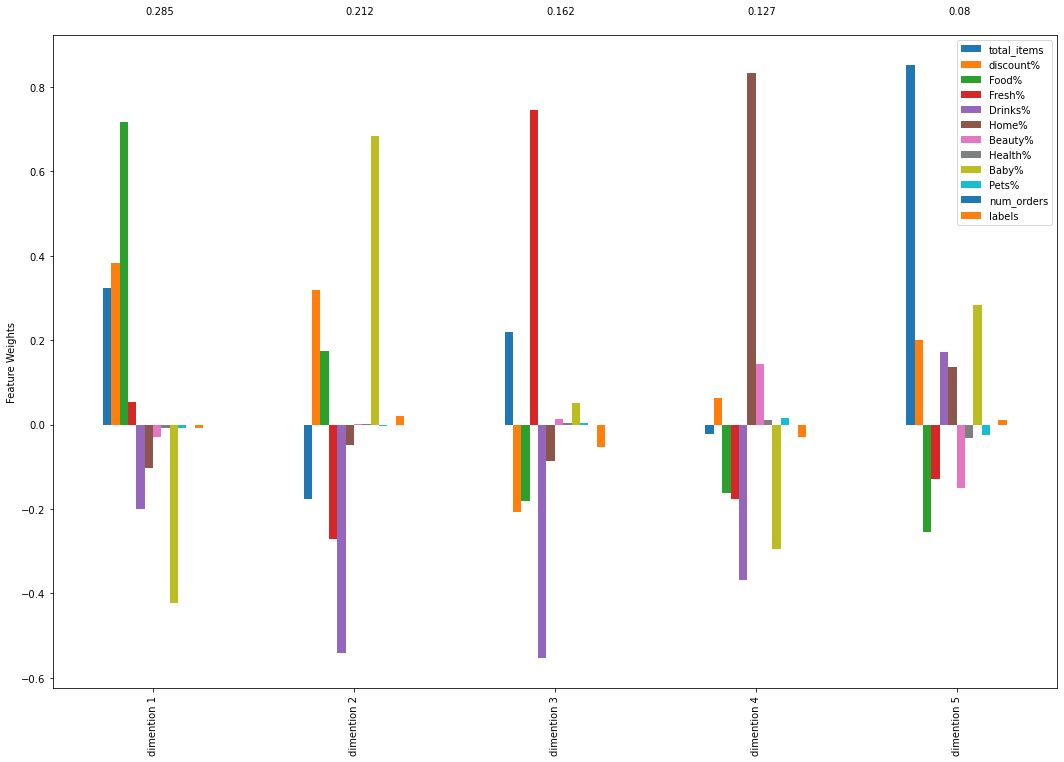

In [43]:
pca_results(pca, df)

In [44]:
def pca_2d_plot(pca, df):
    fig, ax = plt.subplots(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    ax.scatter(transformed_data[:,0], transformed_data[:,1], s=3)
    plt.show()

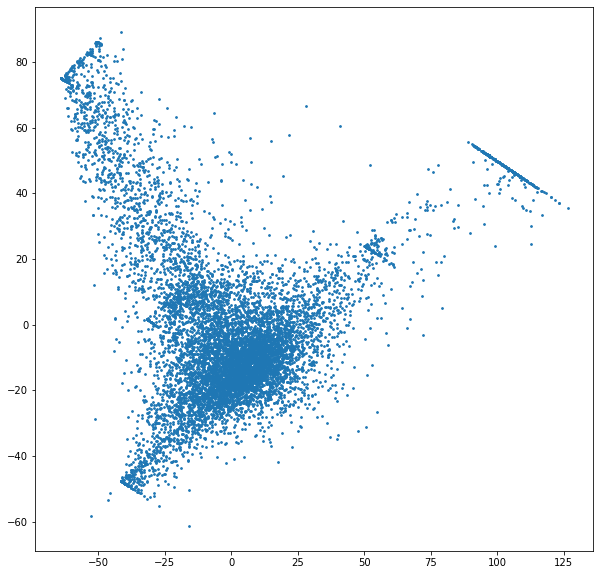

In [45]:
pca_2d_plot(pca, df)

In [46]:
def pca_2d_plot_arrow(pca, df):
    fig, ax = plt.subplots(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    ax.scatter(transformed_data[:,0], transformed_data[:,1], s=3)
    arrow_tail = (ax.get_xlim()[1]/2, ax.get_ylim()[1]/2)
    arrow_head = []
    for i in range(pca.components_.shape[1]):
        arrow_head.append((pca.components_[0,i], pca.components_[1,i]))
    for i in range(pca.components_.shape[1]):
        ax.arrow(arrow_tail[0], arrow_tail[1], arrow_head[i][0], arrow_head[i][1], fc='k', ec='k')
    plt.show()

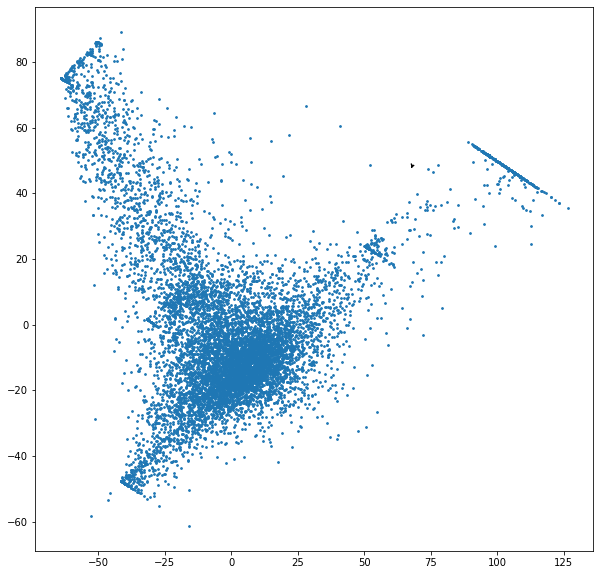

In [47]:
pca_2d_plot_arrow(pca, df)

<Figure size 1440x1440 with 0 Axes>

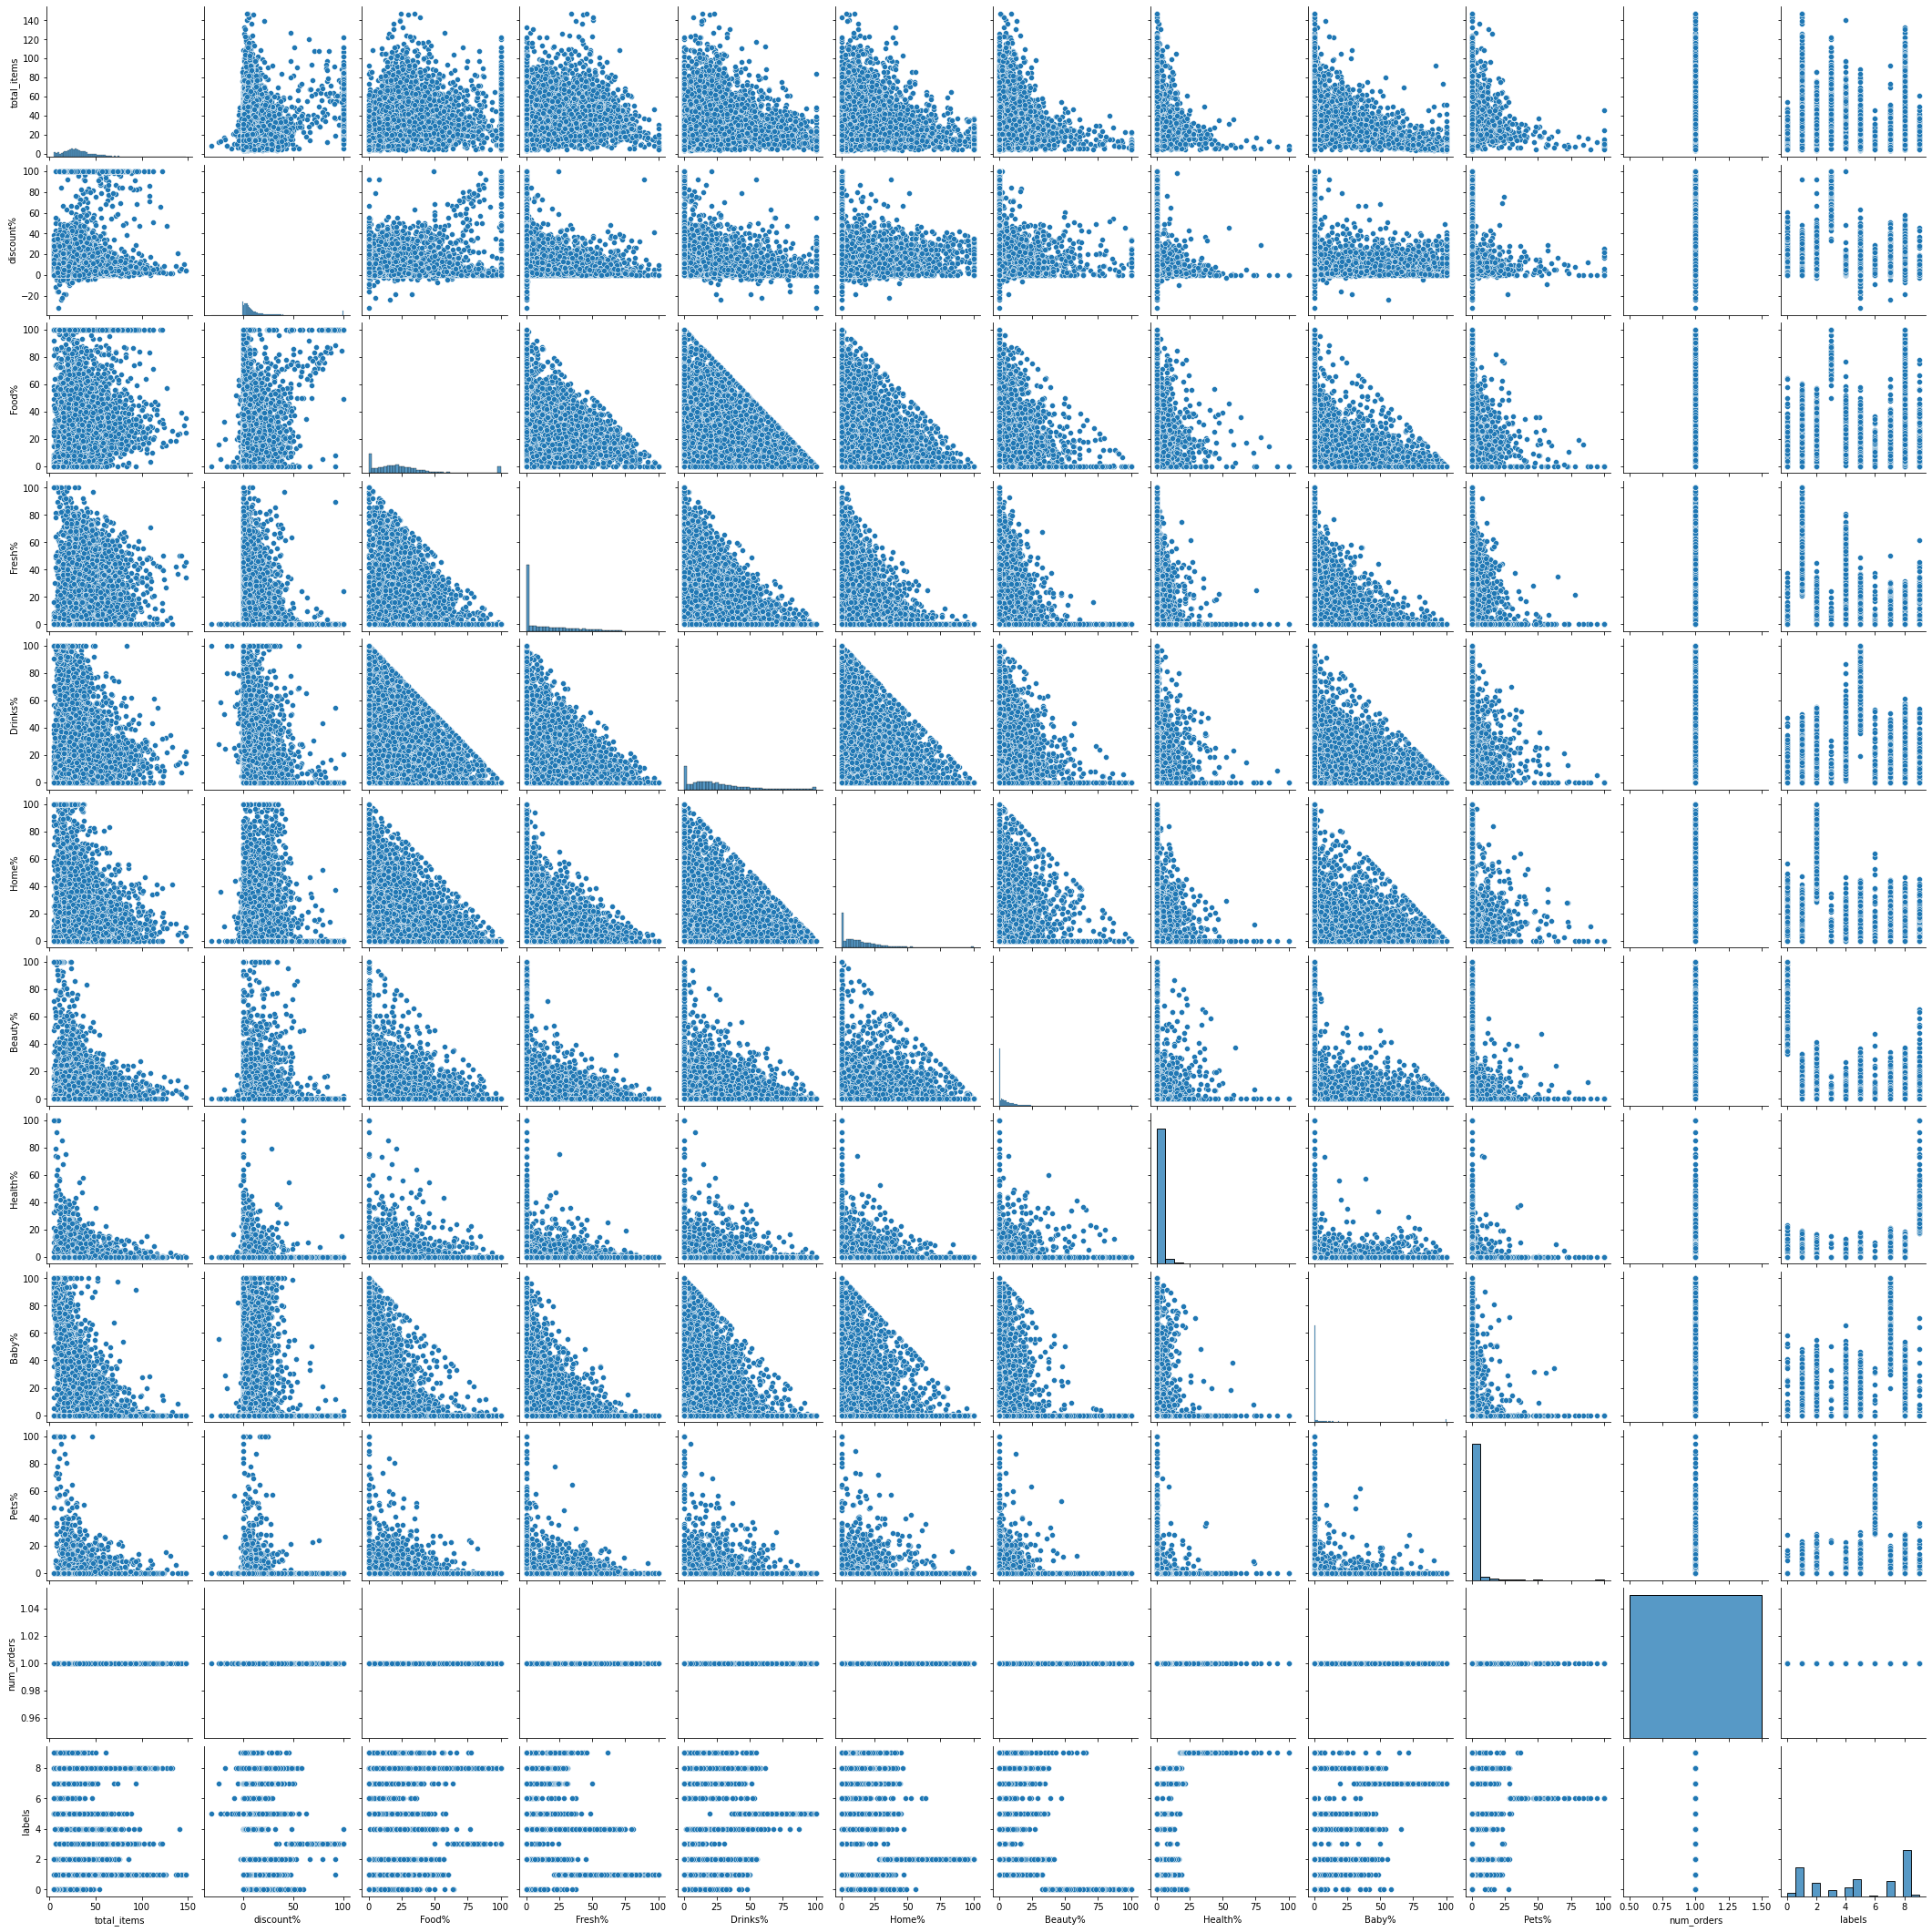

In [48]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

In [49]:
def dependant_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col, axis=1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))

In [50]:
dependant_variable_detector(df)

Using total_items as dependent variable R2 score is :0.20195606629648954
Using discount% as dependent variable R2 score is :0.429345504871782
Using Food% as dependent variable R2 score is :0.9937786830845806
Using Fresh% as dependent variable R2 score is :0.9909655979331387
Using Drinks% as dependent variable R2 score is :0.9924151499064893
Using Home% as dependent variable R2 score is :0.9889596300037888
Using Beauty% as dependent variable R2 score is :0.9747600552839409
Using Health% as dependent variable R2 score is :0.8772882037542264
Using Baby% as dependent variable R2 score is :0.9935180397772446
Using Pets% as dependent variable R2 score is :0.9142262706143632
Using num_orders as dependent variable R2 score is :1.0
Using labels as dependent variable R2 score is :0.4883550939205943


In [51]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

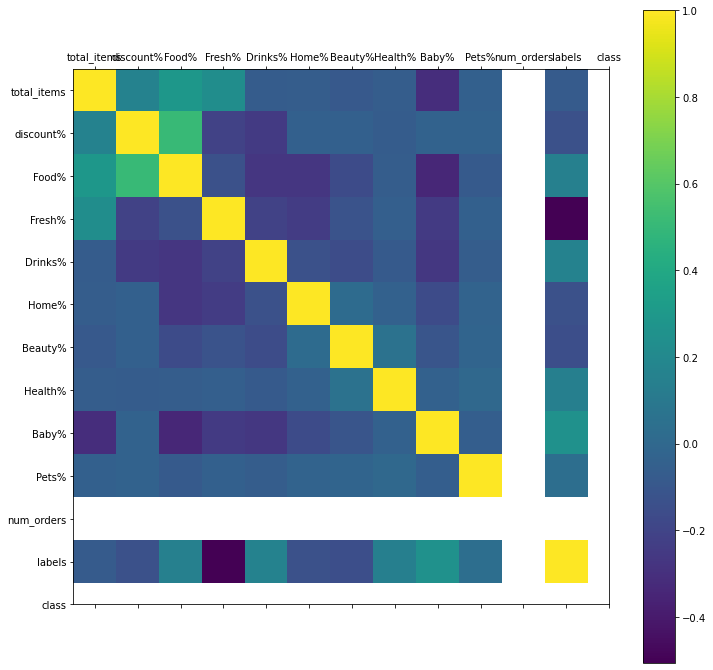

In [32]:
plot_corr_matrix(df)

## Outlier detection

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


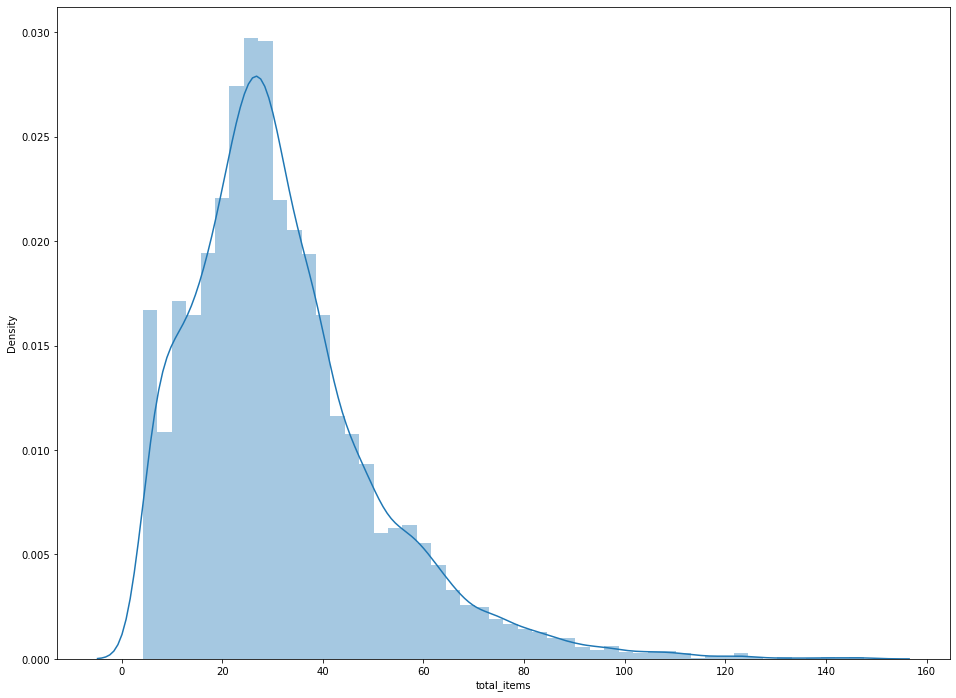

In [52]:
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

This distribution definitely has outliers, let's first apply a log transformations

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


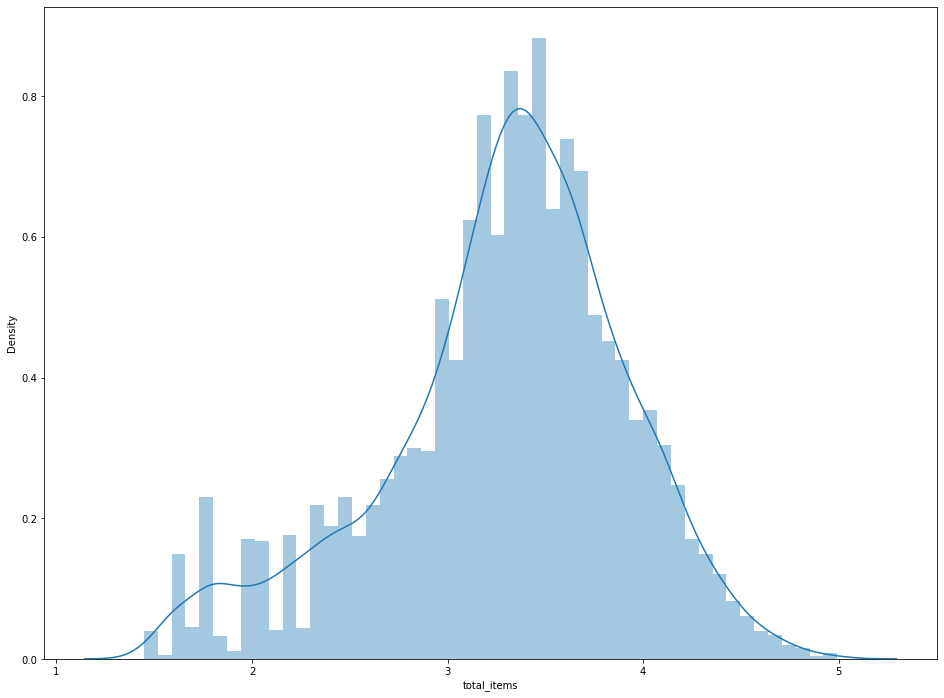

In [53]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

In [58]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]
        
    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index
        
    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))
        
    return outlier_indices

In [59]:
outlier_indices = turkey_outlier_detector(df)

_________________________
total_items-------->133
_________________________
discount%-------->823
_________________________
Food%-------->615
_________________________
Fresh%-------->179
_________________________
Drinks%-------->381
_________________________
Home%-------->458
_________________________
Beauty%-------->625
_________________________
Health%-------->9000
_________________________
Baby%-------->1753
_________________________
Pets%-------->9000
_________________________
num_orders-------->9000
_________________________
labels-------->0


In [60]:
df.drop(outlier_indices['total_items'], inplace=True)

In [65]:
df

total_items  discount%      Food%     Fresh%    Drinks%      Home%  \
customer                                                                       
0            3.799228  14.110000  14.070000  73.203333   4.356667   6.200000   
1            3.438814  17.849000  17.762000  52.909000  17.761000   3.207500   
2            3.258097   2.970000  24.100000  22.290000  38.690000  14.920000   
3            3.324410   4.102174  23.825652  51.280870   8.220870  14.773478   
4            2.839280   4.373103  24.841379  51.082414  10.291034  13.035172   
...               ...        ...        ...        ...        ...        ...   
10227        3.384390  20.235000   0.000000   0.000000   0.000000   0.000000   
10228        3.367296  30.400000  21.775000  44.055000  14.410000   7.680000   
10230        3.032546   8.925000  13.542500   2.767500  15.802500  20.240000   
10231        2.708050   5.277500  35.662500  16.105000  33.030000  15.200000   
10237        3.465736   0.000000   4.625000   0.000000  88.740000   6.635000   

            Beauty%  Health%      Baby%  Pets%  num_orders  labels  
customer                                                            
0          2.176667    0.000   0.000000    0.0         1.0       1  
1          2.314500    4.352   1.695000    0.0         1.0       4  
2          0.000000    0.000   0.000000    0.0         1.0       8  
3          0.000000    0.000   1.898696    0.0         1.0       4  
4          0.683793    0.000   0.065517    0.0         1.0       4  
...             ...      ...        ...    ...         ...     ...  
10227     73.315000   22.020   4.665000    0.0         1.0       0  
10228      5.755000    6.330   0.000000    0.0         1.0       1  
10230      2.192500    0.000  45.450000    0.0         1.0       7  
10231      0.000000    0.000   0.000000    0.0         1.0       8  
10237      0.000000    0.000   0.000000    0.0         1.0       5  

[8867 rows x 12 columns]

In [61]:
frame.drop(outlier_indices['total_items'], inplace=True)

In [66]:
df

total_items  discount%      Food%     Fresh%    Drinks%      Home%  \
customer                                                                       
0            3.799228  14.110000  14.070000  73.203333   4.356667   6.200000   
1            3.438814  17.849000  17.762000  52.909000  17.761000   3.207500   
2            3.258097   2.970000  24.100000  22.290000  38.690000  14.920000   
3            3.324410   4.102174  23.825652  51.280870   8.220870  14.773478   
4            2.839280   4.373103  24.841379  51.082414  10.291034  13.035172   
...               ...        ...        ...        ...        ...        ...   
10227        3.384390  20.235000   0.000000   0.000000   0.000000   0.000000   
10228        3.367296  30.400000  21.775000  44.055000  14.410000   7.680000   
10230        3.032546   8.925000  13.542500   2.767500  15.802500  20.240000   
10231        2.708050   5.277500  35.662500  16.105000  33.030000  15.200000   
10237        3.465736   0.000000   4.625000   0.000000  88.740000   6.635000   

            Beauty%  Health%      Baby%  Pets%  num_orders  labels  
customer                                                            
0          2.176667    0.000   0.000000    0.0         1.0       1  
1          2.314500    4.352   1.695000    0.0         1.0       4  
2          0.000000    0.000   0.000000    0.0         1.0       8  
3          0.000000    0.000   1.898696    0.0         1.0       4  
4          0.683793    0.000   0.065517    0.0         1.0       4  
...             ...      ...        ...    ...         ...     ...  
10227     73.315000   22.020   4.665000    0.0         1.0       0  
10228      5.755000    6.330   0.000000    0.0         1.0       1  
10230      2.192500    0.000  45.450000    0.0         1.0       7  
10231      0.000000    0.000   0.000000    0.0         1.0       8  
10237      0.000000    0.000   0.000000    0.0         1.0       5  

[8867 rows x 12 columns]

## Are there clusters in the data, how many clusters?

In [67]:
from sklearn.cluster import KMeans


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
X = scaler.fit_transform(df.values)

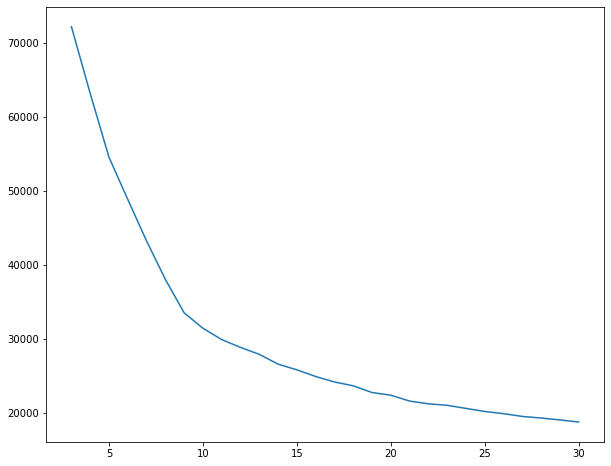

In [70]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

In [71]:
def hopkins_statistic(df):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    n_samples = df.shape[0]
    num_samples = [int(f*n_samples) for f in [0.25,0.5,0.75]]
    states = [123,42,67,248,654]
    for n in num_samples:
        print('-'*12+str(n)+'-'*12)
        hopkins_statistic = []
        for random_state in states:
            data = df.sample(n=n, random_state=random_state)
            nbrs = NearestNeighbors(n_neighbors=2)
            scaler = StandardScaler()
            X = scaler.fit_transform(data.values)
            nbrs.fit(X)
            sample_dist = nbrs.kneighbors(X)[0][:,1]
            sample_dist = np.sum(sample_dist)
            random_data = np.random.rand(X.shape[0], X.shape[1])
            nbrs.fit(random_data)
            random_dist = nbrs.kneighbors(random_data)[0][:,1]
            random_dist = np.sum(random_dist)
            hs = sample_dist/(sample_dist+random_dist)
            hopkins_statistic.append(hs)
            print('*'*25)
            print('hopkins statistic :'+str(hs))
        print('mean hopkins statistic :'+str(np.mean(np.array(hopkins_statistic))))
        print('hopkins statistic standard deviation :'+str(np.std(np.array(hopkins_statistic))))

In [72]:
hopkins_statistic(df)

------------2216------------
*************************
hopkins statistic :0.5585756918352562
*************************
hopkins statistic :0.553071962078261
*************************
hopkins statistic :0.5576447505316102
*************************
hopkins statistic :0.557046316592198
*************************
hopkins statistic :0.555687724343536
mean hopkins statistic :0.5564052890761724
hopkins statistic standard deviation :0.0019122655219913983
------------4433------------
*************************
hopkins statistic :0.5425374081663379
*************************
hopkins statistic :0.5415647916103239
*************************
hopkins statistic :0.5386740292710919
*************************
hopkins statistic :0.5425868945970433
*************************
hopkins statistic :0.5401829540568038
mean hopkins statistic :0.5411092155403201
hopkins statistic standard deviation :0.0014979260081147963
------------6650------------
*************************
hopkins statistic :0.5308624457500811
******

Not a great hopkins statistic score

In [73]:
def kth_nearest_data_point(df, k_max):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    ks = range(1,k_max+1)
    scaler = StandardScaler()
    X = scaler.fit_transform(df.values)
    nbrs = NearestNeighbors(n_neighbors=k_max)
    nbrs.fit(X)
    kneighbors_result = nbrs.kneighbors()[0]
    kth_neighbor_dist = list(np.sum(kneighbors_result, axis=0))
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, kth_neighbor_dist);
    plt.show()

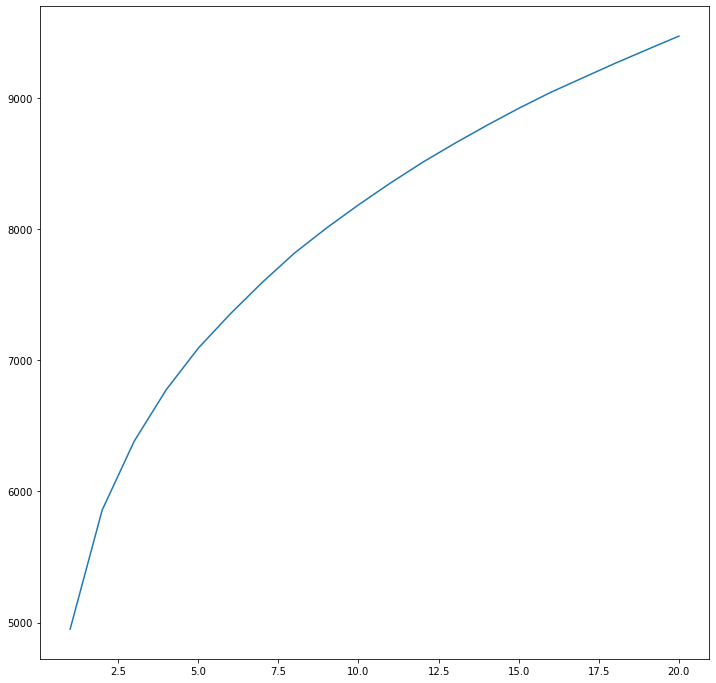

In [74]:
kth_nearest_data_point(df, 20)

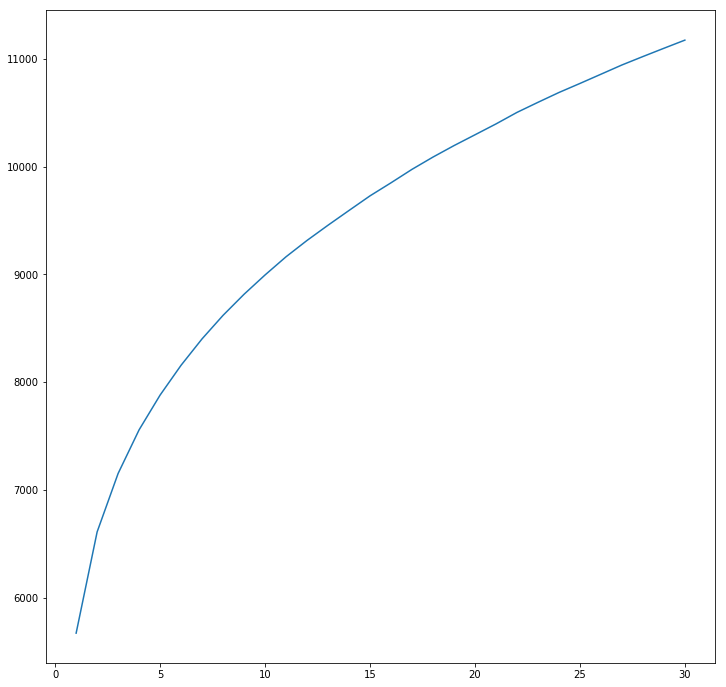

In [44]:
kth_nearest_data_point(df,30)

In [75]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

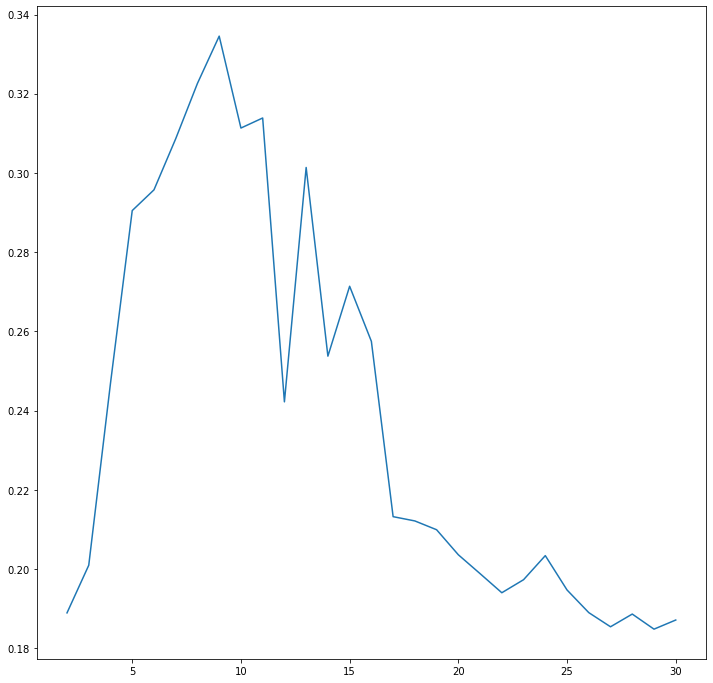

In [76]:
plot_silhoutte_score(X,30)

In [48]:
def ncomponents_of_gmm(X, min_components, max_components):
    from sklearn.mixture import GaussianMixture
    import itertools
    from scipy import linalg
    import matplotlib as mpl
    min_bic = np.inf
    bic = []
    n_components_range = range(min_components, max_components+1)
    cv_types = ['spherical','tied','diag','full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < min_bic:
                min_bic = bic[-1]
                best_gmm = gmm
        
    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    return best_gmm

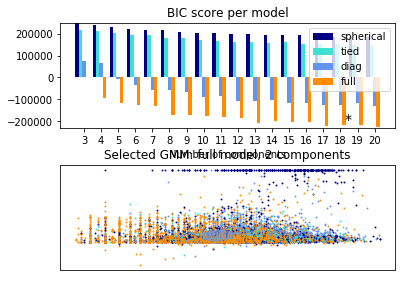

In [49]:
gmm = ncomponents_of_gmm(X, 3, 20)

In [50]:
gmm.covariance_type

'full'

In [51]:
gmm.n_components

20

In [52]:
def entropy(df):
    p_df = {}
    for col in df.columns:
        p_df[col] = df[col].value_counts()/len(df[col])
    entropy = sc.stats.entropy(pd.DataFrame(p_df))
    return entropy

In [53]:
entropy(df)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [54]:
def under_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    ks = range(1,k_max+1)
    UPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        UPM.append(kmeans.inertia_)
    fig, ax = plt.subplots(figsize=(14,14))
    ax.plot(ks, UPM);
    plt.show()
    return UPM

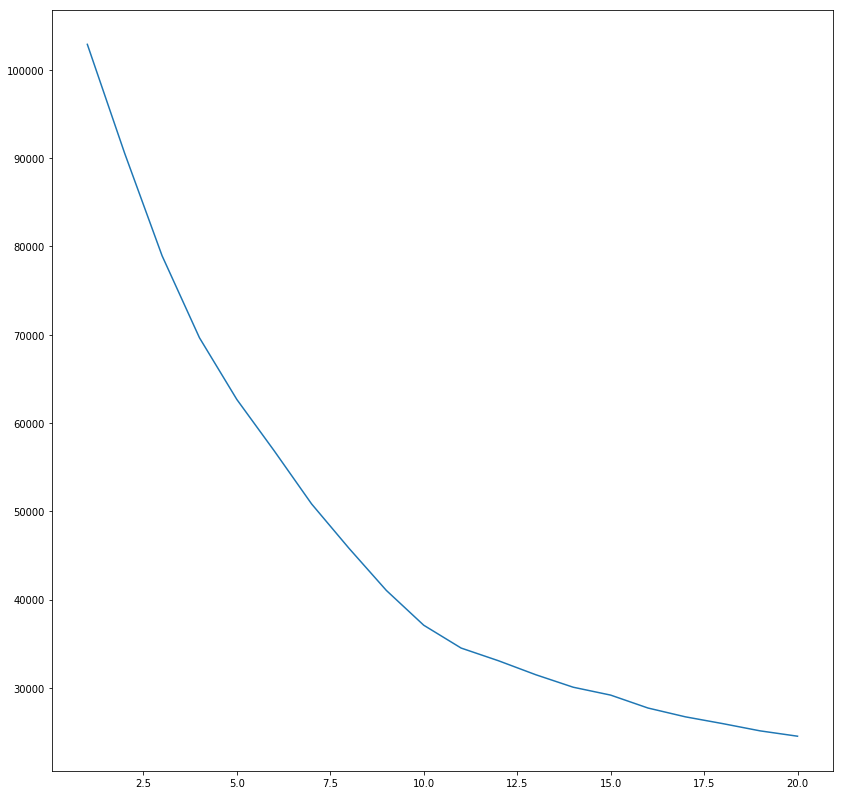

In [55]:
_ = under_partition_measure(X, 20)

In [56]:
def over_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import  pairwise_distances
    ks = range(1,k_max+1)
    OPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
        d_min = np.inf
        for pair in list(itertools.combinations(centers, 2)):
            d = pairwise_distances(pair[0].reshape(1,-1), pair[1].reshape(1,-1), metric='euclidean')
            if d<d_min:
                d_min = d
        OPM.append(k/d_min)
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, OPM)
    plt.show()
    return OPM

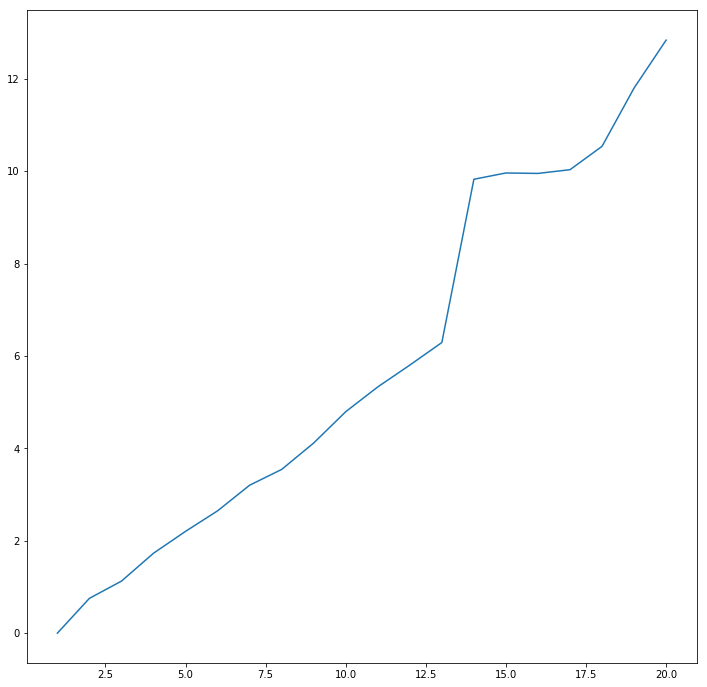

In [57]:
_ = over_partition_measure(X, 20)

In [58]:
def validity_index(X, k_max):
    UPM = under_partition_measure(X, k_max)
    OPM = over_partition_measure(X, k_max)
    UPM_min = np.min(UPM)
    OPM_min = np.min(OPM)
    UPM_max = np.max(UPM)
    OPM_max = np.max(OPM)
    norm_UPM = []
    norm_OPM = []
    for i in range(k_max):
        norm_UPM.append((UPM[i]-UPM_min)/(UPM_max-UPM_min))
        norm_OPM.append((OPM[i]-OPM_min)/(OPM_max-OPM_min))
        
    validity_index = np.array(norm_UPM)+np.array(norm_OPM)
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(range(1,k_max+1), validity_index)
    return validity_index

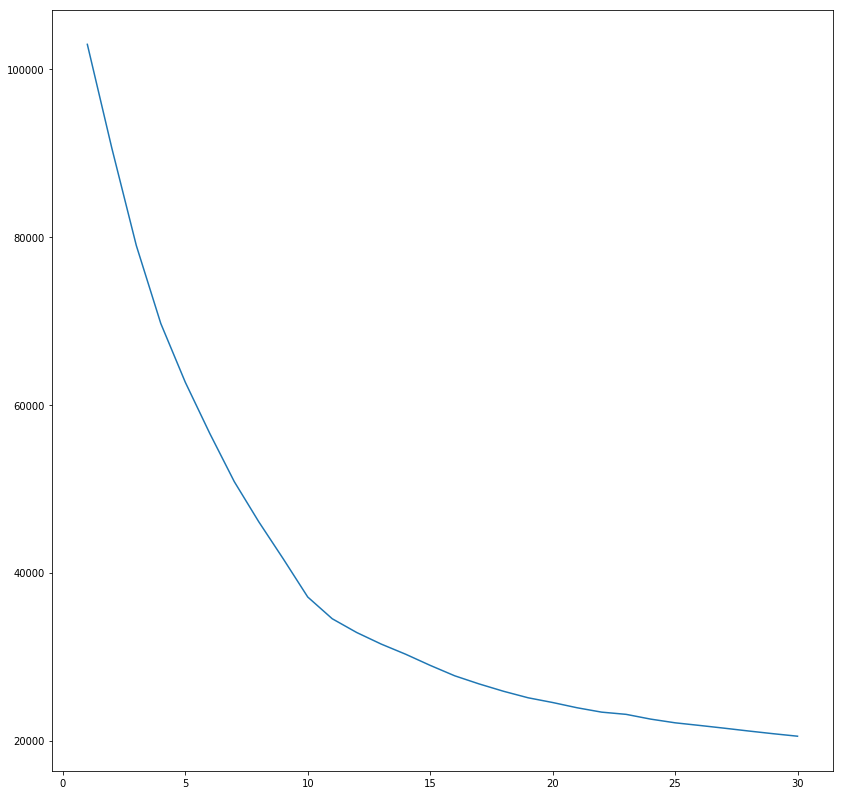

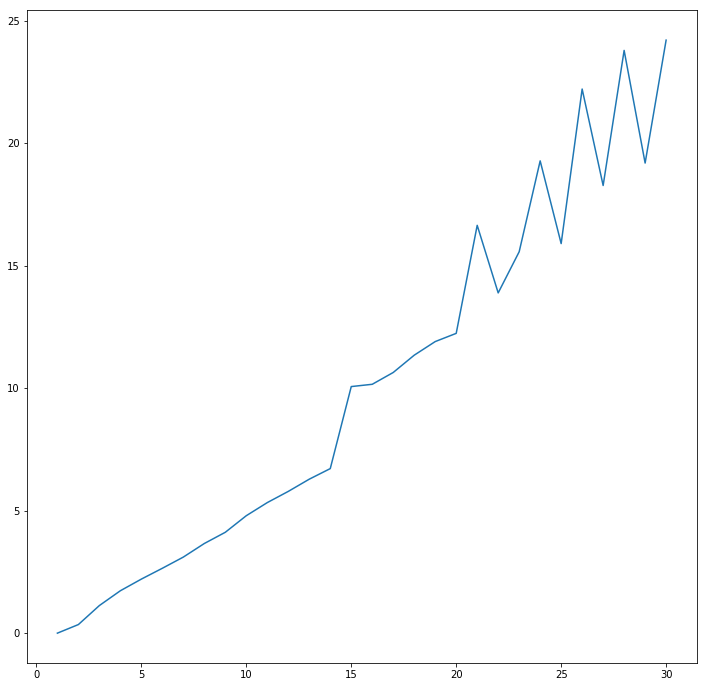

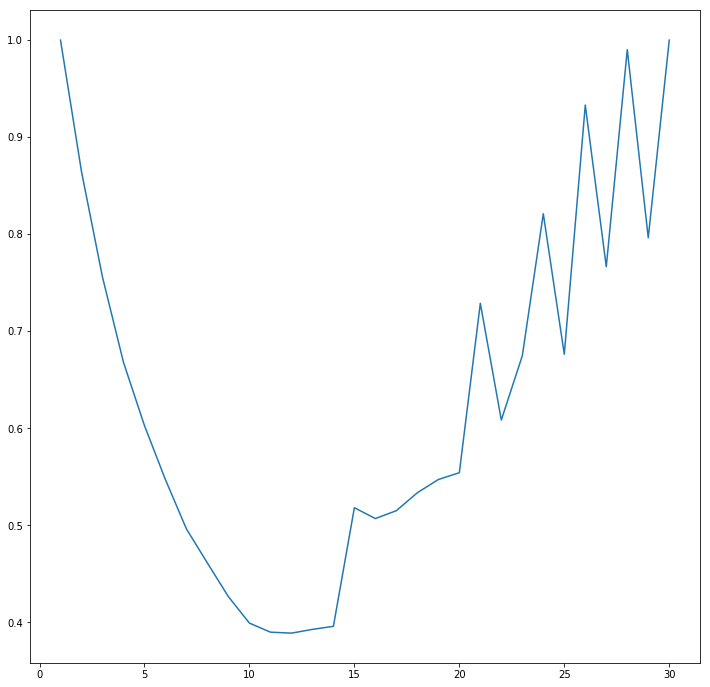

In [59]:
_ = validity_index(X, 30)

All our analysis so far suggests there could be around 10 clusters in the data, let's now manually examine and try to interpret the meaning of these clusters.

### Clustering and Interpretation

In [77]:
k = 10
kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)

ValueError: Length of values (8867) does not match length of index (9221)

In [ ]:
frame[frame['labels']==0]

In [ ]:
frame[frame['labels']==0].describe()

-> These are the class of people who buy beauty products a lot, let's call them beauty concious people.<br>
-> Some seem to buy a lot of grocery and home products as well, should be mothers.<br>
-> These class of people seem to have placed very less number of orders, this a valuable point.<br>
-> ulabox can try for marketing strategies to appeal to these mothers.<br>
-> A campaigning event where these women get their hands on ordering from ulabox, for which they get some incentive will be a good idea.<br>
-> This should be held in market or a beauty parlour where these women are most likely to be seen.<br>

In [63]:
frame.loc[frame['labels']==0, 'class'] = 'beauty_concious'

In [64]:
frame[frame['labels']==1]

order  total_items  discount%  weekday  hour      Food%     Fresh%  \
customer                                                                       
0             0    44.666667  14.110000        4    13  14.070000  73.203333   
7            90    40.000000   0.930000        1    20  23.700000  52.540000   
13          127    32.000000   0.000000        1     9   0.000000  76.950000   
16          136    16.000000  14.000000        5    13   0.000000  51.120000   
17          137    53.000000  18.100000        1    15  11.650000  37.460000   
18          138    20.600000  17.450000        6    12  19.776000  45.038000   
19          143    28.000000  16.960000        1    23  11.696667  40.056667   
23          156    28.000000   0.000000        4    23   6.980000  84.960000   
40          199    69.000000   3.160000        4    23  40.140000  48.300000   
42          211    37.200000   6.662000        1     2  17.772000  24.938000   
51          254    69.250000   3.182500        3     9  18.800000  50.270000   
54          273    60.000000   5.130000        3    20  31.850000  30.420000   
56          289    43.000000   8.726667        7    18  18.733333  39.533333   
61          305    33.625000   5.738750        1    10  23.361250  52.693750   
71          356    19.333333  16.786667        1    13  23.196667  46.550000   
74          361    33.400000  11.384000        1    21  23.634000  32.986000   
78          385    29.000000   7.970000        2    13  15.446667  45.613333   
81          391    58.400000  18.102000        5    10  17.448000  38.090000   
84          403    21.000000   4.220000        5     0  19.050000  54.070000   
107         452    44.500000   6.847500        1    18  11.937500  25.657500   
108         456    17.500000   1.490000        2    16  20.895000  38.450000   
114         495    26.500000  11.705000        7    19  31.096667  28.746667   
116         502    44.000000   3.355000        2    20  28.825000  53.622500   
117         506    28.500000   8.925000        6    11  17.380000  32.475000   
121         522    76.666667   1.246667        3    23  11.058333  38.343333   
146         595    49.000000  17.933750        4    10  13.442500  48.536250   
162         641    38.000000  13.020000        3     9   1.080000  49.990000   
174         683    25.857143   4.867143        4    12  24.438571  41.322857   
195         756    52.666667   9.723333        2    17  11.400000  33.583333   
200         769    56.000000   1.980000        6    12  13.945000  40.005000   
...         ...          ...        ...      ...   ...        ...        ...   
10045     29595    32.000000   4.460000        3    21  11.010000  43.370000   
10048     29600    50.000000   6.840000        7    20  24.790000  56.020000   
10050     29602    67.000000   4.720000        7    21  13.860000  50.430000   
10060     29626    21.000000   4.600000        1    12  27.570000  56.660000   
10063     29634    25.666667   4.020000        1    12  26.786667  52.950000   
10072     29665    24.000000   7.405000        1    16  30.185000  45.470000   
10097     29707    34.750000   4.297500        1    20  30.430000  29.862500   
10101     29716    20.500000   1.872500        3    21  30.970000  52.505000   
10115     29736    25.750000   6.270000        7    16  18.892500  34.230000   
10148     29796    41.000000  25.410000        2    23  19.300000  48.630000   
10150     29805    39.000000   3.210000        3    12  18.300000  35.080000   
10152     29807    21.000000   7.630000        2    20  21.860000  61.180000   
10153     29808    44.500000   5.105000        7    12  26.670000  24.630000   
10156     29815    16.000000   1.790000        6    15  15.565000  29.680000   
10157     29819    42.000000   2.400000        2    21  27.030000  33.660000   
10167     29844    24.333333   1.590000        5    18  30.593333  28.163333   
10178     29863    58.250000   3.395000        3    13  17.360000  29.555000   
10184     

In [65]:
frame[frame['labels']==1].describe()

order  total_items    discount%      weekday         hour  \
count   1877.000000  1877.000000  1877.000000  1877.000000  1877.000000   
mean   17008.286095    40.744083     6.149378     3.689931    15.682472   
std     8339.135588    19.258012     6.858932     2.229806     5.764698   
min        0.000000     5.000000     0.000000     1.000000     0.000000   
25%    10976.000000    28.000000     2.123333     2.000000    12.000000   
50%    17785.000000    37.000000     4.126667     3.000000    17.000000   
75%    24214.000000    49.500000     7.530000     6.000000    21.000000   
max    29980.000000   147.500000    92.000000     7.000000    23.000000   

             Food%       Fresh%      Drinks%        Home%      Beauty%  \
count  1877.000000  1877.000000  1877.000000  1877.000000  1877.000000   
mean     21.648666    45.765669    16.035058     8.650533     4.045120   
std      10.452003    14.779413     9.971978     7.466980     4.933388   
min       0.000000    20.635000     0.000000     0.000000     0.000000   
25%      14.351250    34.185000     8.725000     2.922500     0.000000   
50%      21.027500    43.168000    14.830000     7.260000     2.513750   
75%      28.275000    53.570000    21.852500    12.770000     6.016667   
max      60.340000   100.000000    49.970000    47.368333    32.800000   

           Health%        Baby%        Pets%   num_orders  labels  
count  1877.000000  1877.000000  1877.000000  1877.000000  1877.0  
mean      0.787052     2.242509     0.766773     3.004795     1.0  
std       2.170789     6.446747     2.762467     2.016055     0.0  
min       0.000000     0.000000     0.000000     1.000000     1.0  
25%       0.000000     0.000000     0.000000     1.000000     1.0  
50%       0.000000     0.000000     0.000000     2.000000     1.0  
75%       0.000000     0.000000     0.000000     4.000000     1.0  
max      18.980000    48.360000    23.170000     9.000000     1.0

-> These are the class of people who buy fresh products a lot.<br>
-> I call them regulars because they seem to buy stuff regularly, their order count percentiles are good.<br>
-> There's another class of customers whose order count is way more good, we will call them loyals, hence the name fresh regulars.<br>
-> People buy fresh products like vegetable, milk etc from a vendor they trust, ulabox has earned the trust of these people.<br>
-> ulabox should try to capitalize on this and convert them into their loyal customers.<br>
-> These people are potential customers who could go into the loyals category in near future.<br>

In [90]:
frame.loc[frame['labels']==1, 'class'] = 'fresh_regulars'

In [67]:
frame[frame['labels']==2]

order  total_items  discount%  weekday  hour      Food%     Fresh%  \
customer                                                                       
15          135    25.000000  10.980000        7    14   0.000000  12.290000   
26          162    25.000000   0.000000        1    18   6.880000   0.000000   
28          169     8.500000  15.345000        1    21  30.050000   0.000000   
43          216    25.666667   6.666667        3    15   0.000000   0.000000   
46          223    26.000000  23.840000        4    19   0.000000  13.080000   
49          247     5.000000   0.000000        3    14   0.000000   0.000000   
62          313    11.000000  24.630000        1    11   0.000000   0.000000   
66          319    38.000000   8.730000        5     2  17.710000   7.040000   
76          377    20.500000  14.575000        5    12  32.510000   0.000000   
83          401    21.000000  12.035000        2    19  12.295000   0.000000   
88          415    19.000000  15.130000        1    16  19.110000   8.830000   
89          416    35.000000  39.770000        1    22  11.860000  18.130000   
110         464    12.500000  16.950000        7    10  11.620000   0.000000   
111         466    19.000000  12.970000        1    10   0.000000   0.000000   
122         528    22.500000  13.455000        7    12  11.275000   0.000000   
128         550    24.000000   0.950000        7    18   5.840000  16.640000   
131         554    40.000000  26.090000        1    21   4.550000  13.710000   
133         556    15.000000  17.880000        7    11  24.940000   0.000000   
140         578    23.000000  66.860000        6     0   0.000000   0.000000   
149         608     8.000000  53.290000        7    22  13.310000   3.760000   
153         614    44.000000  24.130000        4    11   0.000000   0.000000   
157         621    12.000000  22.060000        2     9   0.000000  13.790000   
164         651    26.666667  23.676667        2    14   3.126667   0.000000   
184         722    31.750000   8.982500        1    23  11.802500  30.292500   
185         726    10.000000   3.900000        1     0   0.000000   0.000000   
188         729    35.000000   6.300000        1     9  32.920000   0.000000   
190         743    38.000000  10.400000        7    13   2.280000   0.000000   
192         746    39.000000   0.000000        7    23  13.230000   0.000000   
193         747    10.666667   2.283333        3     8  20.440000   0.000000   
221         850    38.500000  15.125000        3    11  24.742500   0.000000   
...         ...          ...        ...      ...   ...        ...        ...   
9982      29446    20.000000   0.000000        6    10  42.720000   0.000000   
9995      29469    14.000000  28.540000        7    20   0.000000   0.000000   
10001     29476    15.000000  15.550000        6    20  20.910000  23.950000   
10005     29492    29.000000  21.120000        7    23  15.670000  11.970000   
10010     29507     6.000000  35.330000        7    11   0.000000   0.000000   
10011     29508    29.000000  15.186667        7    11   6.020000   2.250000   
10016     29523    13.000000   0.780000        7    13  29.070000  19.520000   
10020     29528    20.000000  29.230000        7    21   7.730000   0.000000   
10039     29582    10.000000   0.000000        7    18   0.000000   0.000000   
10040     29583     7.500000   9.290000        4    11   6.935000  17.025000   
10067     29646     8.000000  15.560000        1    10   0.000000   0.000000   
10082     29680    15.000000  11.880000        7    21   8.910000   8.260000   
10087     29685    23.000000   1.220000        1    16  19.520000   6.700000   
10090     29693     6.000000   0.000000        1    16   0.000000   0.000000   
10098     29711    12.500000  35.750000        1    19  47.280000   0.000000   
10107     29727    11.000000   4.240000        1    21   0.000000   0.000000   
10123     29755    21.666667   1.800000        4    18  19.145000   0.803333   
10126     

In [68]:
frame[frame['labels']==2].describe()

order  total_items   discount%     weekday        hour  \
count    909.000000   909.000000  909.000000  909.000000  909.000000   
mean   13489.860286    24.010310   14.778513    3.550055   14.734873   
std     9159.873613    12.785379   11.411471    2.141722    5.838606   
min      135.000000     4.250000   -2.810000    1.000000    0.000000   
25%     5460.000000    15.000000    6.365000    2.000000   11.000000   
50%    12131.000000    22.000000   12.920000    3.000000   15.000000   
75%    21423.000000    29.333333   21.260000    5.000000   20.000000   
max    29974.000000    86.000000   92.100000    7.000000   23.000000   

            Food%      Fresh%     Drinks%       Home%     Beauty%     Health%  \
count  909.000000  909.000000  909.000000  909.000000  909.000000  909.000000   
mean    11.804696    2.751118   14.506242   57.757384    6.721276    0.669849   
std     11.731774    6.520028   13.600048   19.388881    8.787349    2.493694   
min      0.000000    0.000000    0.000000   28.550000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000   42.980000    0.000000    0.000000   
50%      9.210000    0.000000   11.780000   52.130000    2.980000    0.000000   
75%     18.875000    0.460000   23.980000   67.540000   10.915000    0.000000   
max     57.030000   44.830000   55.540000  100.000000   41.780000   16.476667   

            Baby%       Pets%  num_orders  labels  
count  909.000000  909.000000  909.000000   909.0  
mean     4.961027    0.712207    1.676568     2.0  
std     11.278892    3.396209    1.217037     0.0  
min      0.000000    0.000000    1.000000     2.0  
25%      0.000000    0.000000    1.000000     2.0  
50%      0.000000    0.000000    1.000000     2.0  
75%      0.000000    0.000000    2.000000     2.0  
max     55.040000   28.540000   16.000000     2.0

-> These class of people seem to spend a lot under the home products category, let's call them home decorators.<br>
-> Their order count percentiles are not bad.<br>
-> These also could contain mothers who buy more products and less beauty products.<br>
-> Same strategies as above can be used with them as well.<br>

In [69]:
frame.loc[frame['labels']==2, 'class'] = 'home_decorators'

In [70]:
frame[frame['labels']==3]

order  total_items  discount%  weekday  hour    Food%  Fresh%  \
customer                                                                  
100         435    82.250000    49.9625        1    21   81.620   0.000   
341        1248     6.000000    42.8600        3    10  100.000   0.000   
351        1263    21.000000    48.9500        3     9   76.340  15.740   
1370       4256     6.000000    50.0000        2    11  100.000   0.000   
1441       4449    22.000000   100.0000        4     0  100.000   0.000   
1472       4523    41.000000    70.3100        6    21   69.220   0.000   
1476       4540    40.000000    64.6000        2    15   64.600   0.000   
1477       4541    27.000000   100.0000        3    18  100.000   0.000   
1478       4542    39.500000    73.9750        4    23   75.030   1.275   
1480       4545    27.000000   100.0000        6    11  100.000   0.000   
1481       4546    67.000000    74.4800        1    20   72.050   6.670   
1482       4547    29.500000    58.2250        3    11   70.045   0.000   
1485       4551    18.000000   100.0000        7     9  100.000   0.000   
1486       4552    36.000000   100.0000        2    20  100.000   0.000   
1489       4559    17.000000   100.0000        6    19  100.000   0.000   
1492       4566    40.000000   100.0000        2     9  100.000   0.000   
1493       4567    30.000000   100.0000        2     0  100.000   0.000   
1495       4570    33.000000   100.0000        5    21  100.000   0.000   
1496       4571    30.000000   100.0000        5    20  100.000   0.000   
1499       4575    54.000000   100.0000        6    13  100.000   0.000   
1503       4583    26.000000   100.0000        7    14  100.000   0.000   
1508       4591    37.000000   100.0000        7    13  100.000   0.000   
1509       4593    33.000000   100.0000        7    10  100.000   0.000   
1510       4594    28.000000   100.0000        7    12  100.000   0.000   
1513       4604    82.000000   100.0000        1    20  100.000   0.000   
1516       4607    33.000000   100.0000        7    19  100.000   0.000   
1519       4610    31.000000   100.0000        2    22  100.000   0.000   
1523       4621    58.000000   100.0000        6    22  100.000   0.000   
1524       4622    15.000000   100.0000        3    12  100.000   0.000   
1526       4624    46.000000   100.0000        2    21  100.000   0.000   
...         ...          ...        ...      ...   ...      ...     ...   
6893      20662    58.000000   100.0000        1    23  100.000   0.000   
6967      20863    68.000000   100.0000        3    16  100.000   0.000   
6972      20878    54.000000   100.0000        1    20  100.000   0.000   
6983      20900    59.000000   100.0000        3    16  100.000   0.000   
6986      20905    42.000000   100.0000        4    14  100.000   0.000   
6994      20927    72.000000    78.3400        3     3   77.840   0.000   
7019      20982    55.000000   100.0000        3    13  100.000   0.000   
7226      21673    54.000000    98.3600        1    10  100.000   0.000   
7311      21920    12.500000    84.2150        7    21   87.430   3.705   
7459      22406    61.000000   100.0000        1    22  100.000   0.000   
7554      22752    32.000000   100.0000        3    22  100.000   0.000   
7966      24107    36.000000    63.4500        7    17   63.990   9.760   
8762      26561    33.000000    47.5200        3    13   74.650   0.000   
8825      26718    14.666667   100.0000        3    11  100.000   0.000   
8866      26814    57.000000   100.0000        2    10  100.000   0.000   
8995      27191    36.000000   100.0000        1     0  100.000   0.000   
9052      27354    69.000000    79.2600        1    22   79.260   0.000   
9100      27525    69.000000   100.0000        3    12  100.000   0.000   
9203      27775    15.000000   100.0000        2    19  100.000   0.000   
9243      27888    30.000000   100.0000        3     0  100.000   0.000   
9286      27965    29.500000   100.

In [71]:
frame[frame['labels']==3].describe()

order  total_items   discount%     weekday        hour  \
count    387.000000   387.000000  387.000000  387.000000  387.000000   
mean    9654.496124    51.222007   93.718264    3.782946   15.418605   
std     6163.549363    22.758098   13.955821    2.064860    4.970427   
min      435.000000     6.000000   33.330000    1.000000    0.000000   
25%     5461.500000    32.000000  100.000000    2.000000   12.000000   
50%     7574.000000    52.000000  100.000000    3.000000   16.000000   
75%     9600.500000    66.000000  100.000000    5.500000   20.000000   
max    29769.000000   122.000000  100.000000    7.000000   23.000000   

            Food%      Fresh%     Drinks%       Home%     Beauty%     Health%  \
count  387.000000  387.000000  387.000000  387.000000  387.000000  387.000000   
mean    97.108516    0.337429    0.860879    0.727506    0.328374    0.111906   
std      8.363146    2.156057    3.583508    3.718928    1.817458    1.136040   
min     50.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    100.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%    100.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%    100.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max    100.000000   24.240000   30.780000   34.410000   16.535000   15.420000   

            Baby%       Pets%  num_orders  labels  
count  387.000000  387.000000  387.000000   387.0  
mean     0.403445    0.120930    1.211886     3.0  
std      3.536679    1.680724    0.530484     0.0  
min      0.000000    0.000000    1.000000     3.0  
25%      0.000000    0.000000    1.000000     3.0  
50%      0.000000    0.000000    1.000000     3.0  
75%      0.000000    0.000000    1.000000     3.0  
max     50.000000   24.080000    5.000000     3.0

-> These class of people have bought lots and lots of grocery at lots and lots of discount.<br>
-> Their order counts are fairly low, considering this they have supposedly ordered grocery only during the offer period.<br>
-> With the given data, considering the order count to be very less, whatever marketing strategy ulabox used has failed to stop churning of customers.<br>
-> Let's call these people grocery shoppers, remember they bought products mostly in discount.

In [72]:
frame.loc[frame['labels']==3, 'class'] = 'grocery_shoppers'

In [73]:
frame[frame['labels']==4]

order  total_items   discount%  weekday  hour      Food%     Fresh%  \
customer                                                                        
1             3    31.150000   17.849000        1    12  17.762000  52.909000   
3            24    27.782609    4.102174        1    10  23.825652  51.280870   
4            47    17.103448    4.373103        3     9  24.841379  51.082414   
6            77    40.769231    2.683846        2    12  39.315385  23.766923   
8            91    35.250000   23.670000        2    23  24.091250  37.566250   
9            99    17.750000    3.004167        2     8   9.296667  64.840000   
12          118    36.222222    1.961111        7    17  26.698889   3.593333   
41          200    41.000000   20.261818        1    13  28.030909  39.912727   
48          225    40.863636   18.805000        1     1  22.782273  47.901364   
53          259    58.857143   16.721429        6    22  42.280714  44.189286   
55          274    26.266667    1.326667        1    16  15.789333  40.084000   
60          295    28.100000    2.493000        5    14  39.488000  35.142000   
67          320    38.466667    2.410000        1    10  12.175333  47.374000   
69          339    37.000000   12.776667        3     8  25.323333  28.626667   
70          348    31.125000   11.597500        1     1  25.157500  41.572500   
75          366    27.454545    5.533636        7    17  19.796364  30.272727   
112         467    39.785714    3.911429        1    16  28.660714  21.746429   
113         481    59.928571    4.242857        7    22  19.570000  57.855000   
124         532   140.600000    4.018000        1    13  23.702000  50.446000   
160         629    14.900000    4.421000        1    20   4.587000  12.230000   
163         642    18.888889    6.287778        4    10  28.603333  33.221111   
172         671    12.454545    2.270000        1    20  21.890909  14.795455   
180         698    34.210526    6.064737        2    21  17.676316  35.677895   
189         730    72.461538    2.529231        1    14  39.363846  23.855385   
206         780    30.769231   12.523077        1    16  28.918462   0.000000   
212         809    56.857143    3.431429        5     0  10.556429  61.375714   
234         878    26.052632   12.633684        7    16  14.950526  35.718947   
255         951    24.250000   19.423750        4    11  21.308750  26.395000   
260         965    20.571429  100.000000        2    11  48.980952  24.172857   
261         986    38.600000    3.417000        7    19  30.082000  30.535000   
...         ...          ...         ...      ...   ...        ...        ...   
9072      27436    53.500000    4.810000        2    23  26.787500  55.796667   
9079      27462    23.875000   13.298750        1     0  17.056250  36.928750   
9096      27506    41.200000    6.222667        1    23  26.290000  23.703333   
9125      27570    37.375000    4.239375        1    20  13.486250  37.315625   
9163      27682    29.625000    3.397500        7    17  28.981250  39.946250   
9176      27708    48.000000    5.887500        7    22  21.630000  31.021250   
9180      27720    32.000000    7.119091        7    23  20.546364  11.910000   
9220      27810     5.724138   17.095517        4    10  42.436897   7.937931   
9339      28062    28.400000    4.351000        7    15  12.650000  65.557000   
9364      28120    29.857143    1.010714        7    23  18.811429  56.208571   
9377      28163    47.142857    3.388571        1    12   8.800000  63.127857   
9397      28202    38.375000   11.800000        2     1  33.690000  34.650000   
9406      28228    12.200000    2.763000        6    14  34.905000  53.475000   
9444      28303    26.250000    7.137500        3    10  18.153750  36.338750   
9507      28442    40.307692    5.793846        7    13  15.220000  44.227692   
9529      28487    55.769231    6.195385        6    14  15.259231  44.428462   
9570      28578    22.750000    4.951250 

In [74]:
frame[frame['labels']==4].describe()

order  total_items   discount%     weekday        hour  \
count    575.000000   575.000000  575.000000  575.000000  575.000000   
mean   14670.857391    33.569995    6.228436    3.459130   14.819130   
std     8353.099184    14.255616    6.454251    2.268858    5.684993   
min        3.000000     5.724138   -0.055217    1.000000    0.000000   
25%     8195.000000    24.641026    2.582984    1.000000   11.000000   
50%    14722.000000    31.272727    4.709091    3.000000   14.000000   
75%    21941.500000    39.767857    7.523333    6.000000   20.000000   
max    29918.000000   140.600000  100.000000    7.000000   23.000000   

            Food%      Fresh%     Drinks%       Home%     Beauty%     Health%  \
count  575.000000  575.000000  575.000000  575.000000  575.000000  575.000000   
mean    22.827018   33.166813   19.948226   10.689696    3.976131    1.035922   
std     10.107456   18.634680   12.447872    6.865511    3.508303    2.001515   
min      0.842222    0.000000    1.666250    0.000000    0.000000    0.000000   
25%     15.777848   20.582745   11.351667    5.951444    1.588929    0.000000   
50%     21.462857   33.646000   17.169286    9.403529    3.173000    0.136000   
75%     28.556667   46.838154   25.139792   13.941143    5.115000    1.271667   
max     76.439091   80.708000   86.962353   46.759286   26.974444   13.377000   

            Baby%       Pets%  num_orders  labels  
count  575.000000  575.000000  575.000000   575.0  
mean     7.490323    0.781026   12.793043     4.0  
std     11.760801    2.604058    4.718629     0.0  
min      0.000000    0.000000    7.000000     4.0  
25%      0.000000    0.000000   10.000000     4.0  
50%      0.726000    0.000000   12.000000     4.0  
75%     10.962515    0.000000   15.000000     4.0  
max     65.445000   22.751765   52.000000     4.0

-> These people seem to spend their money in every category, which means they depend on ulabox for all these categories.<br>
-> Their order counts are very impressive, implying that they are the most valuable customers of  ulabox.<br>
-> ulabox should make sure to keep these customers satisfied by giving them coupons and other incentives.<br>
-> ulabox should frame strategies to bring other customers into this category, the strategies which failed and succeeded can be judged by doing some data analytics in the generated data.<br>
-> Let's call them loyals and remember that they are the most valuable customers.<br>
-> In case of a shortage of resource or anything, catering the needs of these customers is a wise thing to do.<br>

In [75]:
frame.loc[frame['labels']==4, 'class'] = 'loyals'

In [76]:
frame[frame['labels']==5]

order  total_items  discount%  weekday  hour      Food%     Fresh%  \
customer                                                                       
38          195    23.666667   0.336667        4    12  17.540000   9.273333   
45          220    19.333333   1.810000        1    14   7.506667   3.810000   
50          248    31.166667  10.475000        7    12  20.966667  16.063333   
57          292    39.000000   5.650000        4    20   6.030000   4.070000   
58          293    17.000000  13.750000        3    14  12.550000   0.000000   
59          294    34.000000  11.390000        1    13   0.000000   0.000000   
80          389    17.500000   2.990000        4    21  15.900000   3.150000   
85          404    13.000000   1.400000        4    22  10.140000   8.110000   
97          432    19.000000  22.140000        7    23  30.340000   0.000000   
106         451    12.000000   6.440000        4    20  20.260000   0.000000   
132         555    29.000000   4.890000        6    13  19.380000   0.000000   
136         564     9.000000  17.743750        1    13   5.827500   0.313750   
141         579    18.000000   5.680000        5    22   0.000000   0.000000   
143         587    20.000000   8.370000        5    20  26.010000   0.000000   
154         615    32.000000  11.730000        1     0   3.570000  18.060000   
159         627    27.000000   7.535000        1    23  45.895000   0.000000   
167         656    23.333333   2.410000        7    18  26.420000  20.583333   
179         697    15.000000  16.190000        2    12  22.420000   0.000000   
182         719    32.500000   6.005000        1    18  20.955000   0.000000   
186         727    17.000000   5.020000        3    17   4.860000   0.000000   
199         767    17.000000 -18.880000        3     3  32.595000   0.000000   
202         772    28.000000   7.460000        7    22   0.000000  26.810000   
208         800    30.750000  16.490000        6    16   9.390000   0.000000   
218         843    36.000000   1.305000        7    22  23.050000   0.000000   
223         856    16.000000   7.350000        2    11  24.720000   0.000000   
239         909    13.333333   5.633333        3    10  15.740000   0.000000   
243         919    19.000000   2.293333        1    16   6.510000   7.463333   
250         934    27.000000   3.662000        2    18  17.944000   7.592000   
251         939    28.500000  16.995000        2    11  16.380000  26.080000   
268        1010    34.000000  15.630000        5    13  22.540000   0.000000   
...         ...          ...        ...      ...   ...        ...        ...   
9955      29367     6.000000   0.000000        6    20   0.000000   0.000000   
9957      29369    24.500000   1.680000        5    11  23.420000  14.245000   
9958      29371     8.000000   0.000000        5    14   0.000000   0.000000   
9966      29392     8.000000   0.000000        7    16   0.000000   0.000000   
9971      29420    15.000000   4.950000        5    18   0.970000   0.000000   
9973      29423    16.666667   4.916667        6    15  25.813333   5.056667   
9985      29451    11.000000   2.780000        6    12  16.930000   0.000000   
9988      29456     9.500000   2.675000        1    12   7.290000  34.035000   
9990      29459     8.000000   2.080000        7    11  57.870000   0.000000   
9992      29461    15.200000  41.088000        6    14   1.652000   2.602000   
9996      29470    14.000000   0.000000        7    19   0.000000   0.000000   
9997      29471     5.000000   0.000000        6    17   0.000000   0.000000   
10019     29527     6.000000   0.000000        1    15   0.000000  41.650000   
10046     29596    10.000000   0.000000        7    20   0.000000   0.000000   
10057     29623     9.000000  30.330000        1     0  17.700000   0.000000   
10071     29656    28.777778   7.874444        4    14  10.791111   0.000000   
10093     29698    13.500000   2.275000        1    17   9.470000   9.825000   
10095     

In [77]:
frame[frame['labels']==5].describe()

order  total_items    discount%      weekday         hour  \
count   1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean   15354.925282    23.232889     6.714040     3.568202    15.059948   
std     8946.337521    11.531398     8.356405     2.071420     5.483006   
min      195.000000     4.250000   -31.820000     1.000000     0.000000   
25%     7105.000000    15.000000     1.815833     2.000000    12.000000   
50%    15277.000000    22.000000     4.730000     3.000000    15.000000   
75%    23257.500000    29.000000     8.682273     5.000000    19.000000   
max    29997.000000    89.000000    63.330000     7.000000    23.000000   

             Food%       Fresh%      Drinks%        Home%      Beauty%  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean     12.387918     4.034318    67.647154     9.479477     2.908908   
std      11.244925     7.302398    17.923842    10.564590     5.557382   
min       0.000000     0.000000    19.490000     0.000000     0.000000   
25%       1.295000     0.000000    53.360000     0.000000     0.000000   
50%      10.770000     0.000000    62.935000     5.927500     0.000000   
75%      20.002500     5.287500    80.010000    16.418500     3.688333   
max      57.870000    48.710000   100.000000    44.690000    36.820000   

           Health%        Baby%        Pets%   num_orders  labels  
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.0  
mean      0.426518     2.389108     0.493717     2.447437     5.0  
std       1.960247     7.254387     2.683462     1.762550     0.0  
min       0.000000     0.000000     0.000000     1.000000     5.0  
25%       0.000000     0.000000     0.000000     1.000000     5.0  
50%       0.000000     0.000000     0.000000     2.000000     5.0  
75%       0.000000     0.000000     0.000000     3.000000     5.0  
max      17.745000    46.240000    30.155000    15.000000     5.0

-> This class is a very large one, these people buy a lot of drinks.<br>
-> This may be for a party or a personal good time.<br>
-> Adding a greeting or wishes to these orders from the people of ulabox, wishing them a good time may give them a feeling of inclusion and care.<br>
-> They definitely are valuable customers.<br>

In [78]:
frame.loc[frame['labels']==5, 'class'] = 'drink_buyers'

In [79]:
frame[frame['labels']==6]

order  total_items  discount%  weekday  hour      Food%     Fresh%  \
customer                                                                       
129         551    12.000000  25.040000        2    20   0.000000   0.000000   
166         655    16.000000  12.640000        3     4   0.000000   0.000000   
332        1228    18.000000   0.000000        6    22   0.000000   0.000000   
374        1330    15.000000  14.010000        6    11   0.000000   0.000000   
529        1802     8.000000   4.795000        3     8   0.000000   0.000000   
542        1842    11.000000   5.015000        6    11   3.245000   0.000000   
572        1915    18.000000  14.590000        2    10   7.690000   4.820000   
681        2271    31.000000  18.140000        2    19   0.000000   0.000000   
831        2680     7.000000   5.470000        3    15   0.000000   0.000000   
1132       3588    18.250000  11.717500        7    10  15.202500   0.000000   
1343       4177    25.000000  22.140000        2    15   0.000000   0.000000   
1454       4469    17.000000   9.470000        4    21   0.000000   0.000000   
1514       4605    20.000000   0.000000        1    12  13.700000   0.000000   
1614       4842    23.333333   8.820000        4    23  12.603333   6.283333   
1722       5133    15.000000  27.970000        4    15   0.000000   0.000000   
1830       5446    10.000000  23.360000        2    20   5.150000   0.000000   
2217       6534    15.500000  10.005000        1    12   6.440000   0.000000   
2244       6602     7.000000   9.660000        7    15   0.000000   0.000000   
2279       6729    10.000000   0.000000        7    18  15.660000   0.000000   
2296       6758    23.000000   6.320000        7    12  26.570000   0.000000   
2459       7314    21.000000   1.100000        3    23   8.980000  28.310000   
2463       7324    37.000000   7.835000        4     2   7.645000   0.000000   
2726       7882    12.000000   0.000000        7    23   0.000000   0.000000   
2774       8008    32.000000   0.410000        7    23  17.450000   1.570000   
2841       8165    18.666667   2.483333        1    11  19.856667   8.576667   
3361       9649    19.000000   9.270000        4    13  12.020000   0.000000   
3545      10303    22.000000   6.205000        4    10  21.640000   0.000000   
3615      10570    18.600000   2.894000        1    21   8.582000   4.034000   
3719      10965    15.000000   1.620000        3     9   0.000000   0.000000   
3975      11774     6.000000  16.670000        2    15   0.000000   0.000000   
...         ...          ...        ...      ...   ...        ...        ...   
6867      20592    11.000000   1.690000        5     0  32.130000   0.000000   
6899      20679    27.000000  16.175000        7    23   0.000000   0.000000   
6922      20747    29.000000  14.530000        1    19  35.860000   7.340000   
7057      21118    23.000000   4.530000        3    18  36.260000   0.000000   
7133      21380    23.750000  12.980000        4    16   3.300000   2.842500   
7306      21911    16.000000   1.680000        4    14  18.150000   7.197500   
7332      22012    16.666667  17.583333        2    13  20.480000   0.000000   
7413      22277    14.000000   0.000000        5    20   0.000000   0.000000   
7447      22370    19.500000   6.010000        2    12  11.025000  18.860000   
7549      22725    24.666667   5.373333        1    17   0.000000   0.000000   
7668      23121     6.000000   4.490000        3    12   0.000000   0.000000   
7669      23122    25.000000  18.060000        2    17   4.220000   1.540000   
8179      24767     6.000000   0.000000        7    18   0.000000   0.000000   
8259      25006    10.000000   0.085000        7    21   0.000000   0.000000   
8341      25256    20.500000  22.660000        3    10   4.260000   0.000000   
8451      25591    24.000000   6.360000        5    15   7.560000   0.000000   
8879      26840    10.500000  -9.025000        4    12   0.000000   0.000000   
8979      

In [80]:
frame[frame['labels']==6].describe()

order  total_items  discount%    weekday       hour     Food%  \
count     76.000000    76.000000  76.000000  76.000000  76.000000  76.00000   
mean   15560.513158    17.776096   8.414024   3.618421  15.000000   8.57198   
std     9378.008571     8.735165   8.082974   2.045920   5.401234  10.93730   
min      551.000000     5.000000  -9.025000   1.000000   0.000000   0.00000   
25%     6750.750000    10.375000   2.095000   2.000000  12.000000   0.00000   
50%    16571.500000    17.500000   6.107500   3.000000  15.000000   3.27250   
75%    23121.250000    23.812500  14.140000   5.000000  19.250000  15.60000   
max    29959.000000    46.000000  29.410000   7.000000  23.000000  36.26000   

          Fresh%    Drinks%      Home%    Beauty%    Health%      Baby%  \
count  76.000000  76.000000  76.000000  76.000000  76.000000  76.000000   
mean    3.368132  12.564882  12.355667   4.153224   0.449901   2.199956   
std     7.998930  14.858734  15.065462   8.945168   1.943441   7.127122   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   6.985000   8.860833   0.000000   0.000000   0.000000   
75%     1.665000  22.264167  18.918333   3.730250   0.000000   0.000000   
max    37.610000  53.580000  63.630000  47.250000  10.750000  34.420000   

            Pets%  num_orders  labels  
count   76.000000   76.000000    76.0  
mean    56.336086    1.907895     6.0  
std     24.096157    1.266782     0.0  
min     28.707500    1.000000     6.0  
25%     35.757500    1.000000     6.0  
50%     50.235000    1.000000     6.0  
75%     72.437500    2.250000     6.0  
max    100.000000    6.000000     6.0

-> This is the class of pet lovers, they buy a lot of pet products.<br>
-> This is a very creative area for framing marketing strategies.<br>
-> After collecting some data about the pet they grow, a lot can be done.<br>
-> ulabox can try to give them a cheap incentive that adds more fun to the time they spend with their pets, for example a pet cap, a pet dress, a disc or furr ball to play with the pet etc.<br>
-> ulabox could conduct a competition for the  pets and give some incentives for the winner. The value of the incentives should depend on the pet growing population in the place and the convertion rate they expect.<br>
-> ulabox could go social media and conduct a competition in which, participants post beautiful photos of their pets on on ulabox's page or with a harshtag. This way petlovers who have no idea about ulabox can know about it. Ofcourse again the incentive should be high and resonable corresponding to the convertion rate they expect.<br>
-> This is rather a small class of customers, but remember each pawn is a potential queen.<br>

In [81]:
frame.loc[frame['labels']==6, 'class'] = 'pet_lovers'

In [82]:
frame[frame['labels']==7]

order  total_items  discount%  weekday  hour      Food%     Fresh%  \
customer                                                                       
63          314     5.500000   0.140000        1    12   0.000000   0.000000   
65          317     7.500000   9.625000        7    13   6.215000   0.000000   
96          430    30.500000  12.720000        2    12  16.640000  26.005000   
101         439    16.000000   8.875000        5     0   0.000000   5.085000   
105         450     6.000000   0.000000        6    12   0.000000   0.000000   
123         530    26.000000  17.345000        1    15   5.530000   0.000000   
125         542    15.800000  37.710000        7    22  10.664000  13.974000   
142         581    13.500000   7.101667        4    11   5.378333   0.000000   
147         603    50.000000  23.920000        4    21  33.990000   0.000000   
152         612    10.500000   0.700000        4    18   9.220000   0.000000   
183         721     6.000000   0.000000        7    19   0.000000   0.000000   
187         728     9.000000  41.190000        5    22   0.000000   0.000000   
191         744    10.500000   7.595000        7    22   0.000000   5.865000   
209         804    10.000000   4.010000        6    10   8.880000   0.000000   
213         823    15.000000   1.390000        2    22   3.320000  19.420000   
220         848    15.000000   1.110000        7    22  14.840000   6.325000   
241         913    22.000000   0.000000        5    11   0.000000   0.000000   
264        1005     7.000000   8.120000        1     0   0.000000   0.000000   
265        1006     5.000000   0.000000        7    14   0.000000   0.000000   
273        1029    17.000000   0.000000        2    17   0.000000   0.000000   
319        1183    15.000000  11.370000        7    15   3.580000   0.000000   
323        1199    22.333333   2.876667        7    21   0.560000   1.886667   
331        1227    11.000000  40.440000        7    11   0.000000   0.000000   
343        1250    10.000000   0.000000        7    21  32.560000   0.000000   
350        1262     7.000000   0.970000        2     0   0.000000   0.000000   
359        1286    35.000000  21.350000        1    17  13.120000   0.000000   
379        1348    10.500000  19.395000        2    23   5.030000   0.000000   
386        1363     6.000000   0.000000        4    22   8.240000   0.000000   
396        1393     9.000000  25.150000        1    11   0.000000   0.000000   
401        1401    19.000000   1.660000        3    23   0.000000   0.000000   
...         ...          ...        ...      ...   ...        ...        ...   
9895      29209     8.600000   1.654000        3    19  21.998000  29.828000   
9897      29215    20.000000   4.143333        3    17   2.576667  17.566667   
9905      29231    12.000000   2.720000        3    23   1.960000   5.990000   
9911      29247     4.500000  11.660000        4    14   0.000000   0.000000   
9916      29256    14.000000   8.030000        4    16  22.470000   0.000000   
9930      29294     9.000000  38.580000        3    22   3.560000  11.550000   
9939      29317    12.000000  34.790000        4    22   7.540000   0.000000   
9951      29349     5.285714  12.132857        5    12   8.644286  30.418571   
9981      29442    11.000000   0.832500        6    10   0.222500   3.422500   
10030     29558     7.000000  21.680000        7    17   0.000000   0.000000   
10043     29588     6.000000   1.198000        7    19   0.000000   0.000000   
10062     29628     5.500000  24.983333        1    18   7.310000   5.223333   
10064     29640     9.000000  34.670000        1    10   0.000000   0.000000   
10089     29692     5.000000  34.490000        1    17   0.000000   0.000000   
10091     29694    10.500000  27.990000        1    16   0.895000   0.000000   
10092     29696     7.000000  16.780000        1    17   0.000000   0.000000   
10096     29706    22.000000  25.610000        1    18   9.870000   0.000000   
10118     

In [83]:
frame[frame['labels']==7].describe()

order  total_items   discount%     weekday        hour  \
count    992.000000   992.000000  992.000000  992.000000  992.000000   
mean   15083.631048    14.607754   10.664379    3.719758   14.909274   
std     8733.742750     9.077648   10.386568    2.267680    5.934883   
min      314.000000     4.250000  -23.890000    1.000000    0.000000   
25%     7682.500000     8.000000    2.313750    2.000000   11.000000   
50%    14815.500000    12.100000    7.379286    3.000000   15.000000   
75%    22142.000000    18.750000   17.278750    6.000000   20.000000   
max    29993.000000    93.000000   50.890000    7.000000   23.000000   

            Food%      Fresh%     Drinks%       Home%     Beauty%     Health%  \
count  992.000000  992.000000  992.000000  992.000000  992.000000  992.000000   
mean     5.895224    1.885473    9.001632    7.295049    2.978923    0.789113   
std      8.657442    5.028668   10.744909    9.426482    5.428229    2.727338   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      2.215000    0.000000    5.067500    3.150000    0.000000    0.000000   
75%      8.941875    0.000000   15.060833   11.746250    3.872500    0.000000   
max     63.640000   50.000000   50.970000   44.530000   34.370000   21.260000   

            Baby%       Pets%  num_orders  labels  
count  992.000000  992.000000  992.000000   992.0  
mean    71.482674    0.284664    2.155242     7.0  
std     19.885318    1.929227    1.508835     0.0  
min     19.530000    0.000000    1.000000     7.0  
25%     54.096250    0.000000    1.000000     7.0  
50%     70.760000    0.000000    2.000000     7.0  
75%     89.455000    0.000000    3.000000     7.0  
max    100.000000   28.330000   11.000000     7.0

-> This is again a very great category to work on.<br>
-> Their order count is fairly good too.<br>
-> After collecting some data about the baby, a lot of things can be done.<br>
-> Sending a gift hamper from ulabox on the baby's bday, may send a message to the customers that, ulabox genuinely cares.<br>
-> Conducting a baby beauty peagent and giving incentives for winners, will let the other parents know about ulabox.<br>
-> In these events setting up campaigns where people can make a purchase in ulabox and get a small incentive for it is a good strategy.<br>
-> People don't stay in this class for a long time, this is a valuable point when developing strategies.<br>


In [84]:
frame.loc[frame['labels']==7, 'class'] = 'new_parents'

In [85]:
frame[frame['labels']==8]

order  total_items  discount%  weekday  hour       Food%     Fresh%  \
customer                                                                        
2            23    26.000000   2.970000        6    23   24.100000  22.290000   
5            76    21.000000  11.760000        2    23    6.840000   0.000000   
11          113    46.800000  17.498000        1    11   31.646000   5.224000   
14          128    33.285714   3.360000        7    22   40.201429  18.102857   
20          146    48.000000   3.940000        2     9   30.215000  13.690000   
21          148    19.000000   0.787500        3    20   28.737500   0.000000   
22          152    31.500000   2.102500        7    16   18.390000  20.712500   
24          157    14.000000   7.490000        1    11   67.740000   0.000000   
25          158    32.750000   4.897500        2    19   14.430000  24.827500   
27          163    24.000000   2.811667        1    20   30.258333  22.345000   
29          171    39.666667   7.770000        5    12   18.225000  13.985000   
30          177    26.000000   9.910000        3    19   82.540000   0.000000   
31          178    53.500000   4.850000        7    19   25.700000  23.320000   
32          180    80.000000   2.780000        1    23   23.130000  17.260000   
33          181    30.600000   4.542000        1    21   22.020000  26.048000   
35          187    31.000000   2.932500        2    20   34.120000   0.000000   
36          191    42.000000   7.480000        2     8   28.010000   6.230000   
44          219    51.000000   0.000000        7    18   60.780000   0.000000   
47          224    39.000000   1.090000        7    18   15.040000  18.390000   
64          316    28.000000  13.050000        7    14   24.450000   0.000000   
68          335    71.750000   9.357500        7    23   56.110000  17.752500   
73          360    30.000000   6.750000        1    19   55.420000   0.000000   
77          379    20.333333   2.950000        1    11   15.698333   4.685000   
79          388    23.000000  12.090000        1    19   60.890000   0.000000   
82          396    52.400000   7.278000        3    22   25.324000  12.366000   
86          405    48.500000   4.030000        2    13   38.790000  20.655000   
87          407    34.250000  12.528750        5    12   34.825000   0.000000   
91          418    45.000000   4.475000        5    16   60.760000   0.000000   
92          420    30.666667   0.896667        2    23   38.990000   0.000000   
93          423     5.000000   0.000000        2    22  100.000000   0.000000   
...         ...          ...        ...      ...   ...         ...        ...   
10102     29720    19.000000   0.250000        1    20   36.830000   5.170000   
10105     29723    71.000000  13.113333        1    22   31.230000   2.423333   
10111     29731    63.000000   5.290000        1    22   50.000000   0.000000   
10113     29734    37.000000  -1.970000        1    22   38.440000   0.000000   
10114     29735    15.000000   4.890000        1    22  100.000000   0.000000   
10117     29743    47.000000  11.440000        2     1   39.410000   0.000000   
10120     29747    31.000000   3.366667        1    23   24.381667  24.926667   
10138     29784    56.500000   4.540000        2    14   72.965000   0.000000   
10139     29786    39.000000   5.060000        5    20   75.870000   7.050000   
10140     29787    66.000000   7.310000        2    15   65.370000   0.000000   
10142     29789    48.500000   1.580000        2    16   15.610000  19.610000   
10147     29795    27.000000   3.280000        7    21  100.000000   0.000000   
10151     29806    31.000000   7.480000        2    19   75.120000   0.000000   
10158     29820    22.000000   7.917500        1    21   49.175000  20.682500   
10160     29825    55.000000   1.670000        5     7   29.910000  23.770000   
10162     29832    34.666667   6.630000        3    16   45.213333   0.000000   
10165     29839    27.750000   6.332500  

In [86]:
frame[frame['labels']==8].describe()

order  total_items    discount%      weekday         hour  \
count   3047.000000  3047.000000  3047.000000  3047.000000  3047.000000   
mean   15128.564161    37.167228     7.755919     3.691828    15.405645   
std     8908.191367    17.643142     7.921718     2.170478     5.758964   
min       23.000000     4.500000   -18.060000     1.000000     0.000000   
25%     7255.000000    25.800000     2.767500     2.000000    12.000000   
50%    15106.000000    33.200000     5.486667     3.000000    16.000000   
75%    23085.000000    45.000000    10.105000     6.000000    20.000000   
max    29988.000000   133.000000    58.275000     7.000000    23.000000   

             Food%       Fresh%      Drinks%        Home%      Beauty%  \
count  3047.000000  3047.000000  3047.000000  3047.000000  3047.000000   
mean     37.681865     8.594854    24.845590    15.547702     6.240024   
std      21.297098     8.975392    12.796306    10.545425     7.171407   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      22.845000     0.000000    15.913333     7.155667     0.000000   
50%      33.080000     5.817500    24.813333    15.054000     4.120000   
75%      46.695000    16.212500    34.420000    23.253333     9.475714   
max     100.000000    31.320000    61.510000    46.326000    37.500000   

           Health%        Baby%        Pets%  num_orders  labels  
count  3047.000000  3047.000000  3047.000000  3047.00000  3047.0  
mean      1.026925     5.023655     0.877566     2.71316     8.0  
std       2.656659    10.319977     3.488239     1.82502     0.0  
min       0.000000     0.000000     0.000000     1.00000     8.0  
25%       0.000000     0.000000     0.000000     1.00000     8.0  
50%       0.000000     0.000000     0.000000     2.00000     8.0  
75%       0.000000     3.305000     0.000000     4.00000     8.0  
max      18.766667    53.970000    28.620000     9.00000     8.0

-> These are again very valuable customers of ulabox.<br>
-> They buy from all the categories and their order counts are pretty impressive.<br>
-> Their order counts are not as impressive as the loyal customers, but these are potential customers who has a chance of becoming loyal customers.<br>

In [91]:
frame.loc[frame['labels']==8, 'class'] = 'grocery_regulars'

In [87]:
frame[frame['labels']==9]

order  total_items  discount%  weekday  hour      Food%     Fresh%  \
customer                                                                       
34          186    27.000000  25.950000        1    12  22.270000   0.000000   
90          417    16.000000   4.020000        7    15  12.060000   0.000000   
103         442    33.000000   0.260000        1    19  61.610000   0.000000   
127         549    33.000000   4.410000        2    15  42.060000   0.000000   
156         620    27.000000   1.690000        1    15  11.320000   0.000000   
197         760    25.833333   0.098333        4    11  19.160000  43.358333   
235         897    23.000000   0.000000        5    19  23.310000  23.990000   
256         959    26.000000  10.210000        2    13  18.480000   2.460000   
399        1399    15.000000   6.660000        3    23  15.650000   0.000000   
414        1423    20.000000   1.550000        1    21  32.740000   0.000000   
417        1431    12.000000   6.040000        3    13  20.770000   0.000000   
436        1513    22.000000   4.570000        7    12  17.420000  31.830000   
544        1848     9.000000   1.845000        2    11  38.950000   0.000000   
545        1850    29.000000   0.980000        1    19  44.795000   0.000000   
554        1872     8.000000   0.000000        4    22  36.040000   0.000000   
594        1983    15.000000   0.000000        3    21  22.510000   0.000000   
611        2033    13.000000   8.190000        5    16   0.000000   0.000000   
694        2313    30.666667   2.380000        3    10  21.016667   3.280000   
698        2319    22.666667   4.850000        1    13  18.273333   0.000000   
757        2496    21.500000   9.597500        2    20   2.052500   0.000000   
839        2702    31.400000   1.408000        4    18  38.410000   6.738000   
845        2713    35.000000   4.503333        4    23  37.396667   0.000000   
863        2778    20.000000  13.190000        7    16  15.250000   0.000000   
881        2827     6.000000   0.000000        2    19  56.500000   0.000000   
898        2863    13.000000   0.000000        1    15  14.660000   0.000000   
1060       3405    29.000000   6.510000        7    14   5.270000  26.410000   
1153       3643    28.500000  11.215000        3    11  17.605000   9.265000   
1171       3687    23.000000  19.540000        1    10  28.190000   0.000000   
1296       4063    20.000000  14.740000        1    18   0.000000   0.000000   
1386       4287     5.000000   0.000000        4    14   0.000000   0.000000   
...         ...          ...        ...      ...   ...        ...        ...   
7364      22104    14.000000  10.320000        7    19  21.710000   0.000000   
7409      22254    22.000000   1.000000        7    21  12.750000  61.720000   
7600      22884    17.000000   0.000000        4    10   0.000000  24.750000   
7793      23566    19.000000   9.540000        1    20   7.600000   0.000000   
8003      24251    25.000000   2.250000        5     8  23.660000   7.020000   
8149      24651    22.000000   5.200000        7    21   0.000000   0.000000   
8321      25202    17.000000   4.660000        1    21  18.370000   0.000000   
8356      25290     6.000000   0.000000        3    13  32.120000   0.000000   
8449      25588    26.000000   0.000000        1    18  10.530000  34.200000   
8547      25884    28.000000   0.180000        1    13  25.230000  17.360000   
8583      26024    27.000000   0.950000        3     9  14.660000  28.600000   
8592      26041    35.500000   2.185000        6     3   8.725000   0.000000   
8619      26100    22.000000   0.545000        2     0  10.135000  45.365000   
8759      26540    37.000000   2.180000        6    21  25.740000   0.000000   
8803      26660    21.000000   0.510000        1    21  19.550000  21.560000   
8828      26723     8.000000   0.000000        6    15   9.800000   0.000000   
8833      26734    30.000000   7.220000        4     0  15.190000   0.000000   
8884      

In [88]:
frame[frame['labels']==9].describe()

order  total_items   discount%     weekday        hour  \
count    132.000000   132.000000  132.000000  132.000000  132.000000   
mean   12685.689394    20.650884    5.856258    3.787879   15.098485   
std     9162.427429    10.406621    8.991886    2.193085    5.629611   
min      186.000000     5.000000   -2.520000    1.000000    0.000000   
25%     5061.250000    12.000000    0.143333    2.000000   12.000000   
50%    11542.500000    20.333333    2.865000    4.000000   15.000000   
75%    19618.000000    27.000000    6.662500    6.000000   20.000000   
max    29389.000000    61.000000   45.670000    7.000000   23.000000   

            Food%      Fresh%     Drinks%       Home%     Beauty%     Health%  \
count  132.000000  132.000000  132.000000  132.000000  132.000000  132.000000   
mean    19.190720    6.798968   14.700125    9.908879   10.589891   34.180452   
std     16.733531   12.432527   15.811288   11.656712   14.698494   17.889076   
min      0.000000    0.000000    0.000000    0.000000    0.000000   17.350000   
25%      6.558750    0.000000    0.000000    0.000000    0.000000   22.080833   
50%     15.975000    0.000000    9.890000    5.612500    5.235000   27.720000   
75%     26.450000    7.761250   24.737500   17.306250   16.987500   37.845000   
max     77.690000   61.720000   54.340000   45.140000   65.470000  100.000000   

            Baby%       Pets%  num_orders  labels  
count  132.000000  132.000000  132.000000   132.0  
mean     2.951301    1.679361    1.689394     9.0  
std     10.719938    5.787214    1.870350     0.0  
min      0.000000    0.000000    1.000000     9.0  
25%      0.000000    0.000000    1.000000     9.0  
50%      0.000000    0.000000    1.000000     9.0  
75%      0.000000    0.000000    1.250000     9.0  
max     71.000000   36.980000   15.000000     9.0

-> These are customers who buy a lot of health products, they seem to buy a good amount of drinks, grocery, home and beauty products.<br>
-> The fact that they buy other categories in a good amount makes them valuable customers.<br>
-> Concentrating on these people ulabox can conduct some health based campaigns like a marathon, health awareness programme.<br>
-> But their order counts are very low and their population is pretty low as well. Hence it is best to stick to cheap marketing strategies.

In [89]:
frame.loc[frame['labels']==9, 'class'] = 'health_concious'

That was nicely interpretablle

In [93]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18,18));
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':frame['class'].values})
    sns.lmplot(x='dim1',y='dim2',hue='labels',data=data, fit_reg=False, size=16);
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':frame['class'].values})
    sns.lmplot(x='dim2',y='dim3',hue='labels',data=data1, fit_reg=False, size=16);
    plt.show()

<Figure size 1296x1296 with 0 Axes>

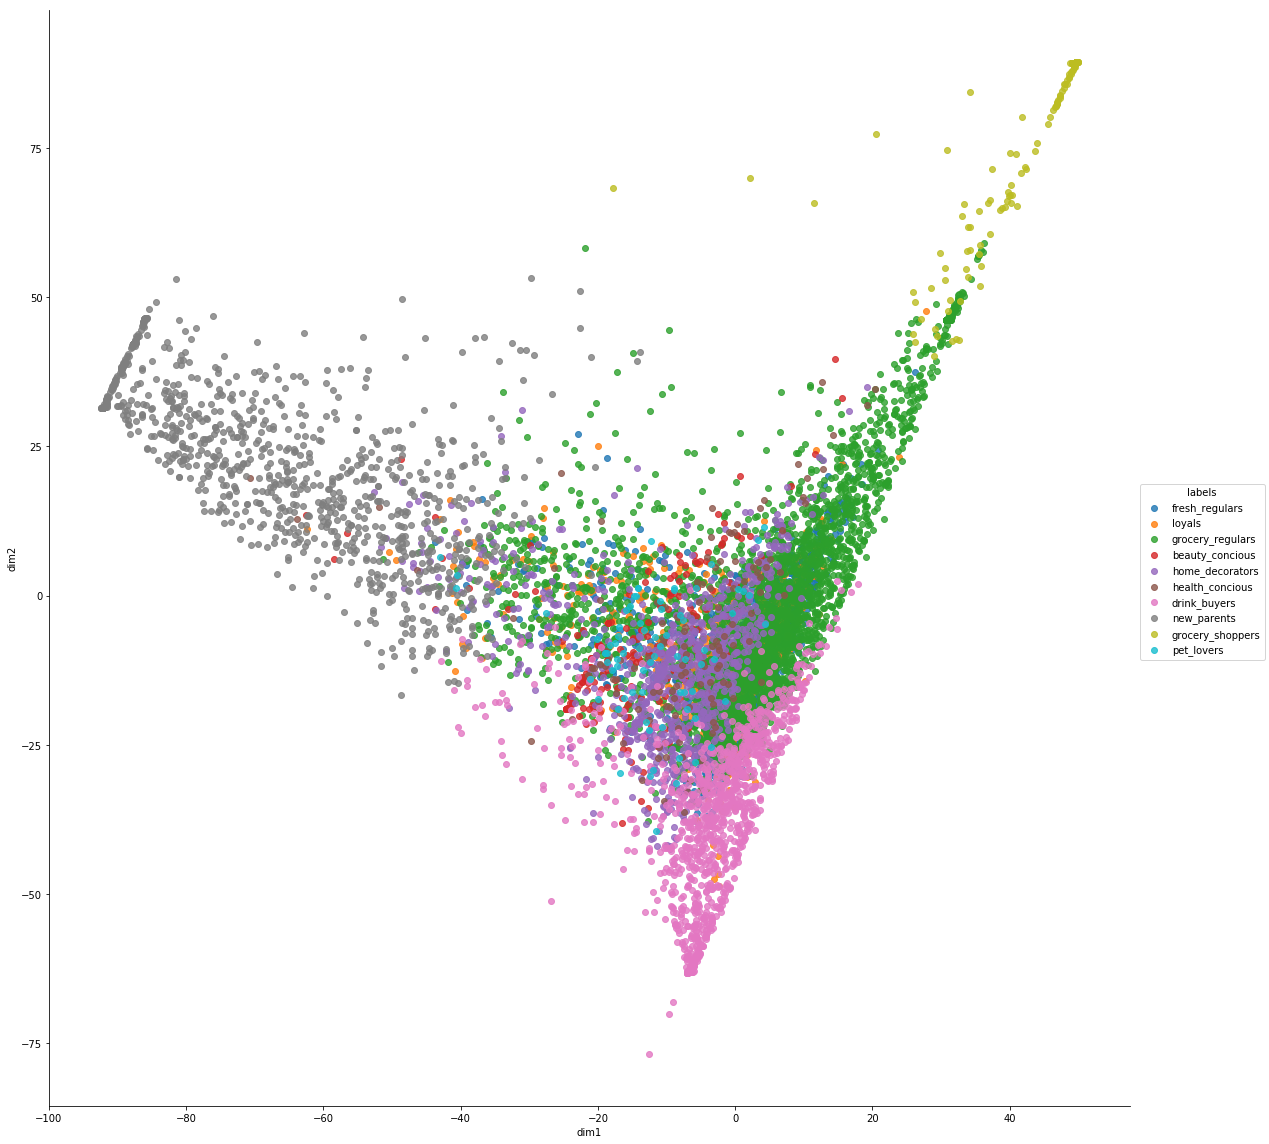

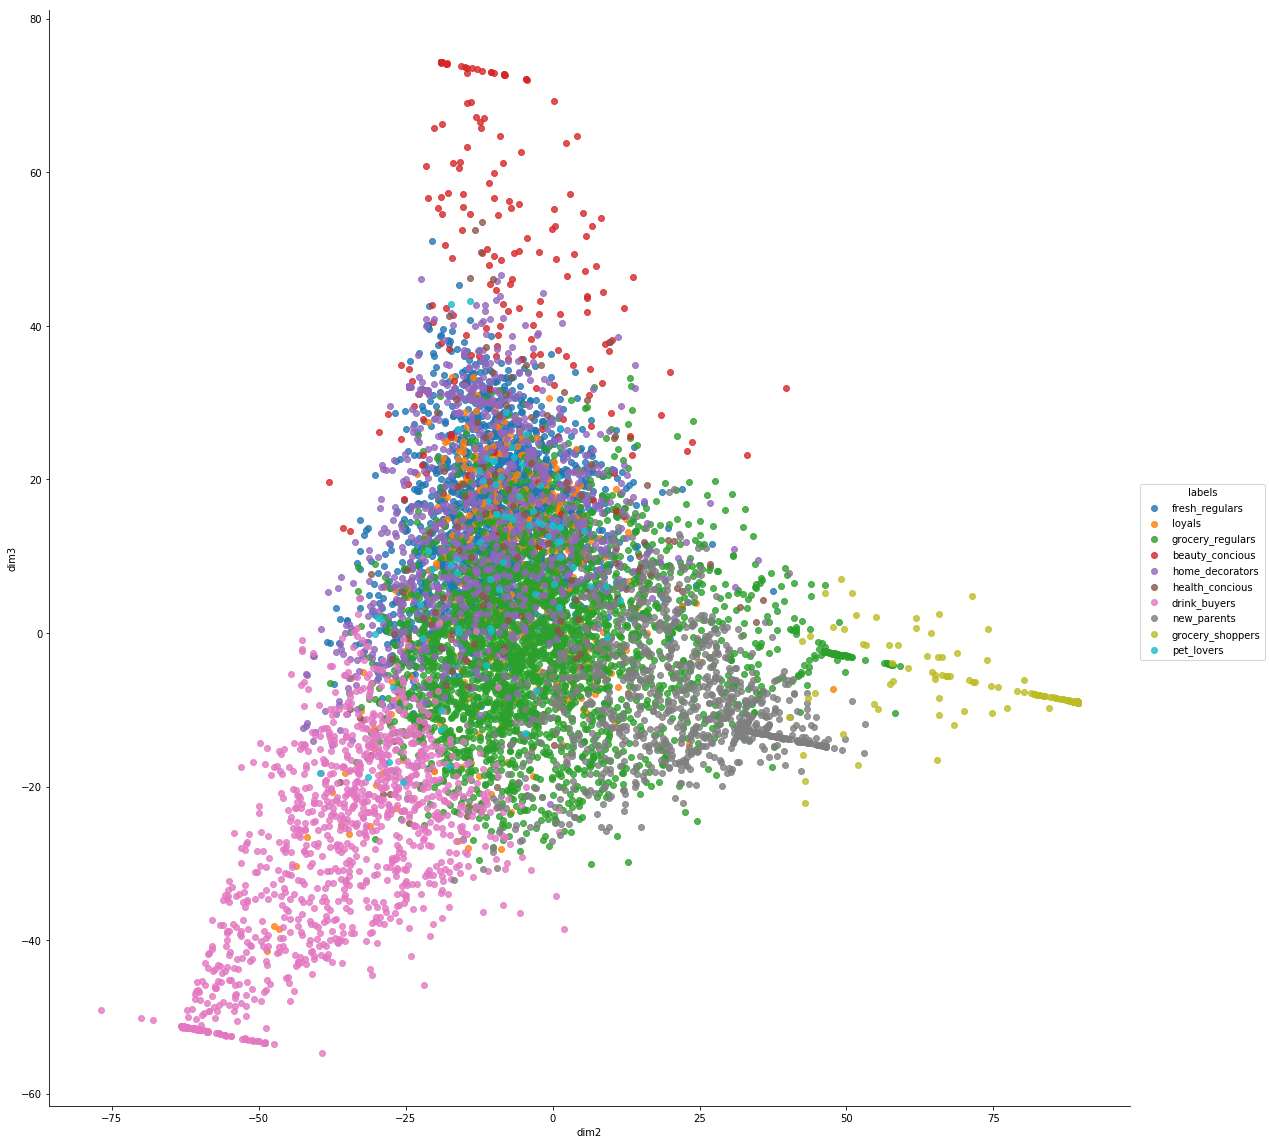

In [94]:
pca_2d_plot_labels(pca, df, frame)

In [95]:
frame.to_csv('customer_segmentation.csv')

In [3]:
frame = pd.read_csv('customer_segmentation.csv')

In [4]:
frame.groupby('class')['num_orders'].describe()

count       mean       std  min   25%   50%    75%   max
class                                                                      
beauty_concious    208.0   1.350962  0.826435  1.0   1.0   1.0   1.00   6.0
drink_buyers      1151.0   2.447437  1.762550  1.0   1.0   2.0   3.00  15.0
fresh_regulars    1877.0   3.004795  2.016055  1.0   1.0   2.0   4.00   9.0
grocery_regulars  3047.0   2.713160  1.825020  1.0   1.0   2.0   4.00   9.0
grocery_shoppers   387.0   1.211886  0.530484  1.0   1.0   1.0   1.00   5.0
health_concious    132.0   1.689394  1.870350  1.0   1.0   1.0   1.25  15.0
home_decorators    909.0   1.676568  1.217037  1.0   1.0   1.0   2.00  16.0
loyals             575.0  12.793043  4.718629  7.0  10.0  12.0  15.00  52.0
new_parents        992.0   2.155242  1.508835  1.0   1.0   2.0   3.00  11.0
pet_lovers          76.0   1.907895  1.266782  1.0   1.0   1.0   2.25   6.0

-> Note that in the loyals class the minimum number of orders itself is 7.<br>
-> Regulars, drink_buyers and new_parents have pretty impressive order counts as well.

In [5]:
frame.groupby('class')['num_orders'].mean().sort_values(ascending=False)

class
loyals              12.793043
fresh_regulars       3.004795
grocery_regulars     2.713160
drink_buyers         2.447437
new_parents          2.155242
pet_lovers           1.907895
health_concious      1.689394
home_decorators      1.676568
beauty_concious      1.350962
grocery_shoppers     1.211886
Name: num_orders, dtype: float64

-> The grocery shoppers being at the lowest for mean number of orders again supports the hypothesis that the people who bought on discount churned.